In [ ]:
!git add "TD4_Sklearn.ipynb"
!git commit -m "corrected erroneous formula bias variance"
!git puhs o

# Introduction to Scikit Learn library

## General Workflow

<img src="td4_ressources/img_ML_worflow.png" align="left" width="75%">

### Step1: EDA  (Exploratory data analysis)

### Step2: Data preparation
* Data preprocessing & transformations
* Feature engineering
* (Feature selection)
* Missing values imputations
* Handling of outliers

### Step3: Modeling  
Depending on what you want to achieve:
* Split in Training and Test (randomly shuffled) (and/or validation set)
* Train a model on Training set, validate on test set (or validation set)
* model Hyperparameters tuning
* K-Fold cross validation or Bootstrap to check model predictions'stability / variance
* Go back to step 1 or 2 if not satisfied

## Import du dataset

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
california_housing = fetch_california_housing()
{ k:type(v) for k,v in california_housing.items() }

{'data': numpy.ndarray,
 'target': numpy.ndarray,
 'frame': NoneType,
 'target_names': list,
 'feature_names': list,
 'DESCR': str}

In [4]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [5]:
california_housing.target_names

['MedHouseVal']

discussion sur des critères discriminatoires : https://mail.python.org/pipermail/scikit-learn/2017-July/001683.html

## Récupérer x et y

In [6]:
X = california_housing.data
y = california_housing.target
X.shape, y.shape

((20640, 8), (20640,))

# Look at the data  (i.e. EDA = Exploratory Data Analysis)

In [7]:
import pandas as pd

In [8]:
df = pd.DataFrame(california_housing.data, 
                  columns=california_housing.feature_names)
df.head(5)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [9]:
df.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

In [10]:
df.describe().T

count         mean          std         min         25%  \
MedInc      20640.0     3.870671     1.899822    0.499900    2.563400   
HouseAge    20640.0    28.639486    12.585558    1.000000   18.000000   
AveRooms    20640.0     5.429000     2.474173    0.846154    4.440716   
AveBedrms   20640.0     1.096675     0.473911    0.333333    1.006079   
Population  20640.0  1425.476744  1132.462122    3.000000  787.000000   
AveOccup    20640.0     3.070655    10.386050    0.692308    2.429741   
Latitude    20640.0    35.631861     2.135952   32.540000   33.930000   
Longitude   20640.0  -119.569704     2.003532 -124.350000 -121.800000   

                    50%          75%           max  
MedInc         3.534800     4.743250     15.000100  
HouseAge      29.000000    37.000000     52.000000  
AveRooms       5.229129     6.052381    141.909091  
AveBedrms      1.048780     1.099526     34.066667  
Population  1166.000000  1725.000000  35682.000000  
AveOccup       2.818116     3.282261   1243.333333  
Latitude      34.260000    37.710000     41.950000  
Longitude   -118.490000  -118.010000   -114.310000

Let's do a pairwise comparison between features 

In [8]:
import matplotlib.pyplot as plt

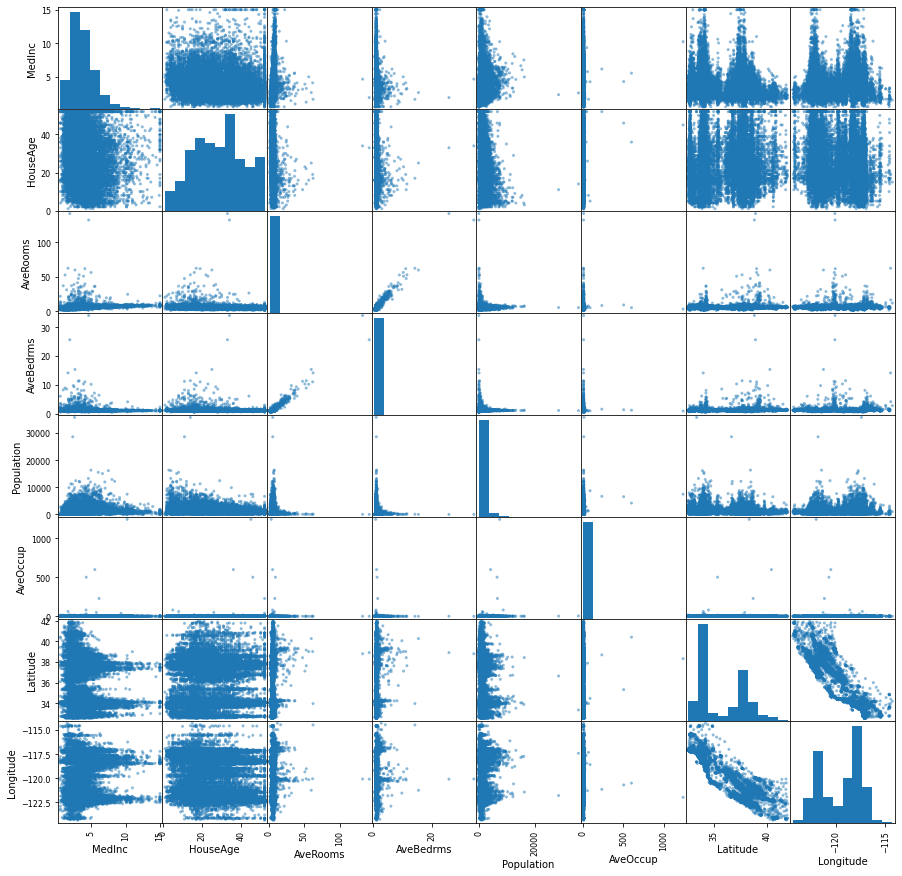

In [12]:
infos = pd.plotting.scatter_matrix(df, figsize=(15,15))

Let's plot the target against each of those features

In [16]:
##def adding_plot_to_grid(fig, ncols):
##    from itertools import count, cycle, repeat, chain, permutations
##    import matplotlib.gridspec as gridspec
##    import matplotlib.pyplot as plt
##    
##    # for ncols==3: 1 1 1 2 2 2 3 3 3 
##    seq_rows = chain.from_iterable(repeat(x, ncols) for x in count(start=1, step=1))
##    seq_cols = cycle(range(1, ncols+1)) # for ncols==3: 1 2 3 1 2 3 1 2 3
##    
##    while True:
##        current_nrows = next(seq_rows) # next row w.r.t. ncols
##        current_col   = next(seq_cols) # next col
##        tmp = current_col if current_nrows==1 else ncols
##        gs = gridspec.GridSpec(current_nrows, tmp)
##
##        for i in range(len(fig.axes)):
##            fig.axes[i].set_subplotspec(
##                gs[ i // ncols, i %  ncols])
##        fig.tight_layout()
##        
##        # add a new subplot
##        ax = fig.add_subplot(gs[current_nrows-1, current_col-1])
##        ax.plot([1,2,3])
##        fig.tight_layout()
##        
##        yield fig
## https://gist.github.com/LeoHuckvale/89683dc242f871c8e69b

In [17]:
## new_fig = pyplot.figure()
## gen = adding_plot_to_grid(new_fig, 3)
## %matplotlib inline
## fig = next(gen)

In [19]:
#in a Jupyter Notebook, the command fig, ax = plt.subplots()
#and a plot command need 
# to be in the same 
# cell in order for the plot to be rendered.
#from IPython.display import display
#display(fig)

In [28]:
import numpy as np

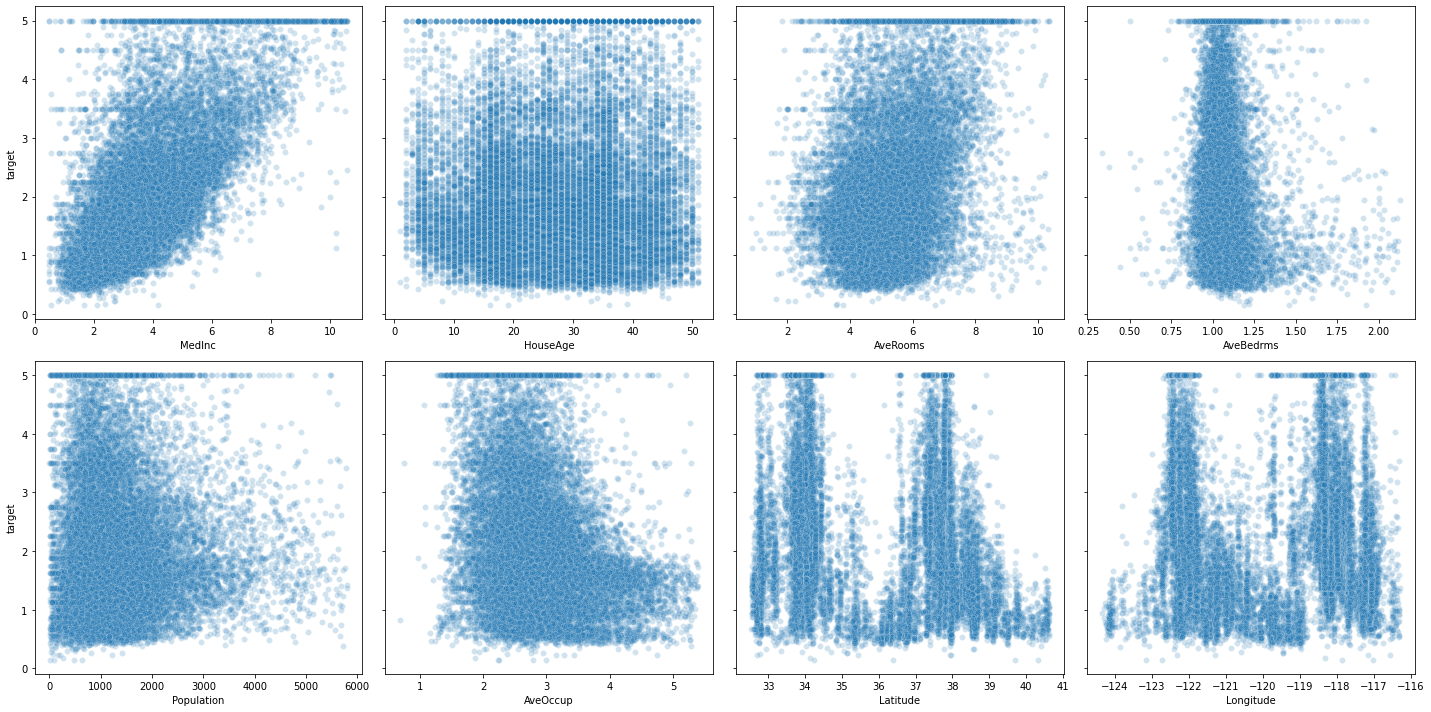

In [27]:
ncols, nrows = 4, 2
fig, axes = plt.subplots(figsize=(5*4,5*2), nrows=nrows, ncols=ncols, sharey=True)

for index, (name_col, col_series) in enumerate(df.iteritems()):
    data = pd.DataFrame(np.vstack([np.array(col_series), y]).T, columns=['input', 'target'])
    subset = data[data.input< np.percentile(data.input, 99)]
    i, j = index // ncols, index % ncols
    sns.scatterplot(x=subset.input, 
                    y=subset.target, 
                    ax=axes[i,j], 
                    alpha=0.2)
    axes[i,j].set_xlabel(name_col)
plt.tight_layout()

# Preprocessing the data

Many variables can have different units (km vs mm), hence have different scales.

many estimators are designed with the assumption [**all features vary on comparable scales** !](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py)

**In particular metric-based and gradient-based estimators** often assume approximately **standardized data** (centered features with unit variances), except decision tree estimators that are robust to scales<br>
**Standard deviation** tells us about **how the data is distributed around the mean**.<br>
Values from a standardized feature are expressed in **unit variances**. 

* **Scalers** are affine transformers of a variable**. 

a standardization scaler (implementend as scikit-learn `StandardScaler`):

$$ x_i = \frac{x_i - X_{mean}}{X_{std}} $$

for all $x_i$ in the realized observations of $X$

Normalization scalers (still for features) **rescale** the values into a range of $[\alpha,\beta]$, commonly $[0,1]$.<br> 
This can be useful if we need to have the values set in a positive range. Some normalizations rules can deal with outliers.<br> `MinMaxScaler` though is sensitive to outliers (max outliers are closer to 1, min are closer to 0, inliers are *compressed* in a tiny interval (included in the main one $[0,1]$).

An example of such, implemented in sklearn as `MinMaxScaler`
:

$$x_i = \frac{x - x_{min}}{x_{max} - x_{min}}$$ 

for all $x_i$ in the realized observations of $X$

Using `StandardScaler` or `MinMaxScaler` might depend on your use case? some [guidance](https://datascience.stackexchange.com/questions/43972/when-should-i-use-standardscaler-and-when-minmaxscaler)

Also using penalization techniques (especially **ridge regression**, we will see that later) impose constraints on the size of the coefficients, where **large coefficients values** might be **more affected** (large linear coefficients are often drawn from **low valued variables since using high units'scale**).

* You can use also non-linear transformations:
    * Log transformation is an example of non-linear transformations that reduce the distance between high valued outliers with inliers, and respectively gives more emphasis to the low valued observations.
    * Box-Cox is another example of non-linear parametrized transformation where an optimal parameter `lambda` is found so to ultimately map an arbitriraly distributed set of observations to a normally distributed one (that can be later standardized). This also gives the effect of giving less importance to outliers since minimizing skewness.
    * QuantileTransformer is also non-linear transformer and greatly reduce the distance between outliers and inliers. Further explanation of the process can be found [here](https://stats.stackexchange.com/questions/325570/quantile-transformation-with-gaussian-distribution-sklearn-implementation)

* Finally, Normalizer normalizes a **data vector** (per sample transformation) (not the feature column) to a specified norm ($L_2$, $L_1$, etc.), e.g. $\frac{x}{||x||_2}$ for $L_2$ norm.

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
import seaborn as sns

In [40]:
def identity(x):
    return x

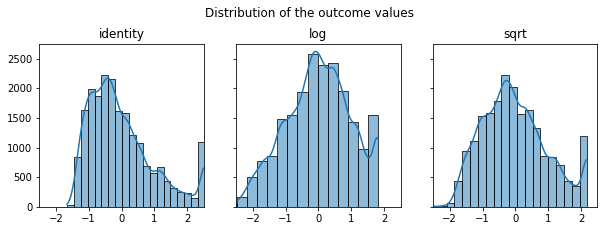

In [41]:
fig, axes = plt.subplots(1,3, figsize=(10,3), sharey=True)
plt.suptitle("Distribution of the outcome values", x=0.5, y=1.05)
for ax, func in zip(axes, [identity, np.log, np.sqrt]):
    result = func(y.reshape(-1, 1))
    result = StandardScaler().fit_transform(result)
    sns.histplot(result[:,0], kde="true", ax=ax, bins=20)
    ax.set_title(func.__name__)
    ax.set(ylabel=None)
    ax.set_xlim(-2.5,2.5)

> `sklearn.preprocessing.PowerTransformer:`
Apply a power transform featurewise to make data more Gaussian-like.
This is useful for
modeling issues related to heteroscedasticity (non-constant variance),
or other situations where normality is desired.

for box-cox method: `lambda parameter` for `minimizing skewness` is estimated on each feature independently

applying it to the independent data or dependent one ? 
> The point is that you use this particular transformation to solve certain issue such as as heteroscedasticity of certain kind, and if this issue is not present in other variables then do not apply the transformation to [them](https://stats.stackexchange.com/questions/149908/box-cox-transformation-of-dependent-variable-only)

Sometimes you even have to re-express both dependent and independent variables to attempt linearizing [relationships](https://stats.stackexchange.com/questions/35711/box-cox-like-transformation-for-independent-variables) (in the examlpe highlighted there: first log-ing the pressure and inverse-ing the temperature gives back the Clausus-Chapeyron relationship 
$$ \color{red}
            {\ln{P}} = \frac{L}{R}\color{blue}{\frac{1}{T}} + c$$

$X$ is a feature: it is also mathematically considered as column vector.<br>
Hence $X^T$ is the transposed used for a dot product ( shape of $X^T$ is $(1, p)$ )

In [42]:
df.HouseAge.head(4)

0    41.0
1    21.0
2    52.0
3    52.0
Name: HouseAge, dtype: float64

In [43]:
np.array(df.loc[:,["HouseAge"]])[:4] # [:4] is just to show the 4th first elements

array([[41.],
       [21.],
       [52.],
       [52.]])

In [44]:
np.array(df.HouseAge).reshape(-1,1)[:4] # [:4] is just to show the 4th first elements

array([[41.],
       [21.],
       [52.],
       [52.]])

In [45]:
from sklearn.preprocessing import PowerTransformer
pt_y = PowerTransformer(method="box-cox", standardize=True)
pt_y.fit(y.reshape(-1, 1))
print('lambda found: {}'.format(pt_y.lambdas_))
y_box_coxed = pt_y.transform(y.reshape(-1, 1))

lambda found: [0.12474766]


> "RGB and RGBA are sequences of, respectively, 3 or 4 floats in the range 0-1." https://matplotlib.org/3.3.2/api/colors_api.html

In [46]:
randcolor = lambda : list(np.random.random(size=3)) 

In [47]:
randcolor()

[0.6833369639833915, 0.8161914673207246, 0.3268027373629534]

By putting all transformed values to the same scale (**scaling**)

In [48]:
from sklearn.preprocessing import StandardScaler

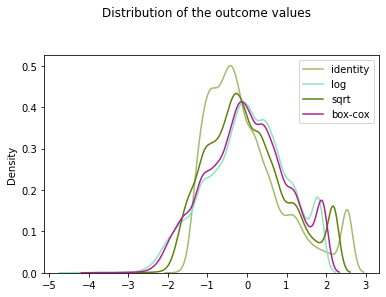

In [49]:
fig, ax = plt.subplots(1,1)
plt.suptitle("Distribution of the outcome values", x=0.5, y=1.05)
for func in [identity, np.log, np.sqrt]:
    result = func(y).reshape(-1,1)
    result = StandardScaler().fit_transform(result)
    sns.kdeplot(result[:,0],
                 ax=ax, 
                 color=randcolor() , 
                 label=func.__name__)
    ax.set_label(func.__name__)
    ax.set(ylabel=None)
sns.kdeplot(y_box_coxed[:,0], ax=ax, color=randcolor(), label="box-cox")
plt.legend()

## Look for correlations (linear, or by ranking)

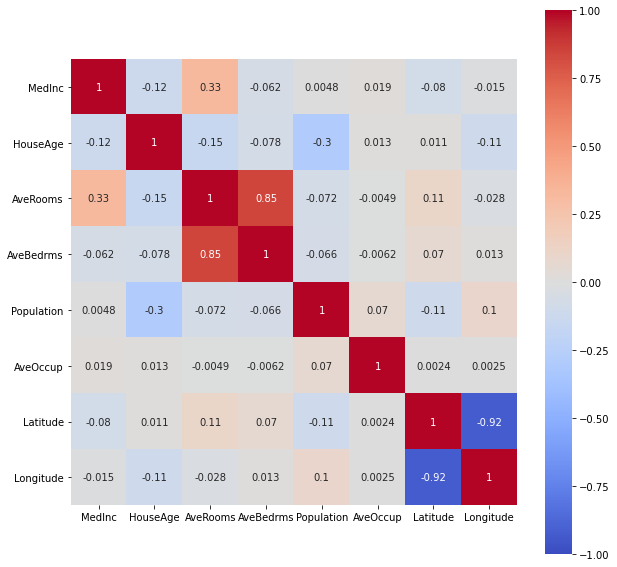

In [50]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True);

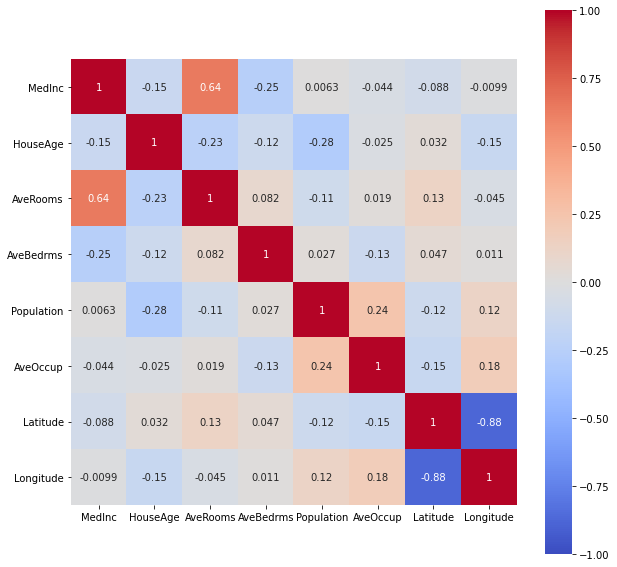

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr("spearman"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True);

# Sklearn estimator object: 

A common interface for all models (below is the general use case for supervised learning tasks, as we have seen an example above as with LinearRegression estimator)

<img src="td4_ressources/sklearn_estimator_object.png" width="50%" align="left">

the following dictionary will enable me to save the **performances of the different built models trained on the training data and evaluated on the test set**.

# Choosing a performance metric

Metrics are quantitative measurements. 
The first, informal, definition of metric is consistent with the definition statistic, i.e. function of a sample <=> estimator 

We could use the risk function MSE (mean squared error) to compare how bad in average (expected value) is each model at predicting values (using squared error loss), but in a regression case we could use a rather familiar statistic: the **coefficient of determination $R^2$. It shows the proportion of the variance in the dependent variable that is predictable from the independent variable(s).<br>
Closer to 1 is better, alhough it is important to check if there is no issues, like the **curse of dimensionality**.<br>
$R^2$ is useful because it is often easier to interpret since it doesn't depend on the scale of the data but on the variance of $Y$ explained by the vars of $Xs$



## $R^2$ coefficient of determination 

In linear least squares multiple regression with an estimated intercept term, $R^2$ equals the **square of the Pearson correlation coefficient between the observed $y$** and **modeled (predicted) $\hat{y}$ data values of the dependent variable**.<br>

In a linear least squares regression with an intercept term and a single explanator, this is also equal to the **squared Pearson correlation coefficient of the dependent variable $y$ and explanatory variable $x$.**

How to derive $R^2$ ? We first need to define $SST$, $SSE$ and $RSS$:

$$SST = SSE + RSS$$ (variance in the data expressed as some of squares distances around the mean) = variance explained by the model + remaining variance of the errors)


--- 
Be cautious with the litterature ! 
- Sometimes SSE means Sum of Square Errors (<=> Residual sum of squares)
- Sometimes while SSR means Sum or Square Regression (<=> variance explained by the regression model <=> ESS "Explained sum of squares")



$$SST = \sum_{i=1}^{n}{(y_i - \bar{y})^2} $$

$$RSS = \sum_{i=1}^{n}{(y_i - \hat{y})^2} $$

$$ESS = \sum_{i=1}^{n}{(\hat{y}-\bar{y})^2} $$

we seek to improve ESS, that is the variance explained by the model

$$ R^2 = \frac{ESS}{TSS} = 1 - \frac{SSResiduals}{TotalSS} $$

and $$MS(P)E = \frac{SSResiduals}{nbsamples} $$

$R^2$ and $MS(P)E$ are linked by the following formula:

$$ MS(P)E(y,\hat{y}) = \frac{SSResiduals(y,\hat{y})}{Nsamples}$$



For example, curse of dimensionality, results as in higher dimensional training data, as we can always fit perfectly a n-dimension hyperplane to n+1 data points into a n+1 dimension input space. The more dimensions the data has, the easier it is to find a hyperplane fitting the points in the training data, hence falsely resulting in a huge $R^2$

> How to get p-values and a nice summary in Python as R summary(lm) ? https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression

In [481]:
import numpy as np

In [482]:
from sklearn.linear_model import LinearRegression

#### Linear regression for 3 points with 1 feature

In [483]:
lm = LinearRegression(fit_intercept=True)
x = np.array([[4], [5], [6]])
y = np.array([3.2, 4.5, 7])
lm.fit(X=x, y=y)

LinearRegression()

In [488]:
R2 = lm.score(X=x, y=y)
R2

0.967828418230563

In [485]:
lm.coef_

array([1.9])

In [486]:
lm.intercept_

-4.599999999999997

In [500]:
y - np.mean(y)

array([-1.7, -0.4,  2.1])

/Users/lucbertin/.pyenv/versions/3.8.4/lib/python3.8/site-packages/matplotlib/patches.py:1338: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)
/Users/lucbertin/.pyenv/versions/3.8.4/lib/python3.8/site-packages/matplotlib/patches.py:1338: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)
/Users/lucbertin/.pyenv/versions/3.8.4/lib/python3.8/site-packages/matplotlib/patches.py:1338: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a lis

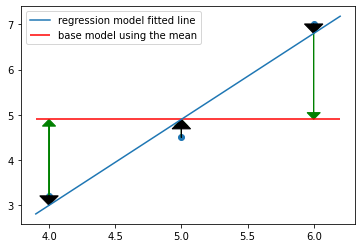

In [570]:
plt.scatter(x,y)
line_x_coords = np.linspace(3.9, 6.2, 3)
plt.plot(line_x_coords, lm.predict(line_x_coords[:, np.newaxis]), label="regression model fitted line")
plt.hlines(np.mean(y), xmin=min(line_x_coords), xmax=max(line_x_coords), color='red', label="base model using the mean")
for ix,iy in zip(x,y):
    #plt.arrow(x, y, dx, dy)
    # for arrow to the mean
    plt.arrow(ix, iy, 0, -(iy-np.mean(y)), head_width=0.10, color="green", length_includes_head=True)
    # for arrow to the fitted regression line
    plt.arrow(ix, iy, 0, -float(iy-lm.predict(ix[:,np.newaxis])), head_width=0.14, color="black", length_includes_head=True)
plt.legend()


$$SST = \sum_{i=1}^{n}{(y_i - \bar{y})^2} $$




In [577]:
SST = np.sum((y - np.mean(y))**2)

$$RSS = \sum_{i=1}^{n}{(y_i - \hat{y})^2} $$



In [580]:
RSS = np.sum((y-lm.predict(x))**2)

In [581]:
RSS, SST

(0.24000000000000044, 7.459999999999999)

$$ R^2 = \frac{ESS}{TSS} = 1 - \frac{SSResiduals}{TotalSS} $$



In [585]:
R2_train = 1 - RSS/SST
print(R2_train == R2)
R2_train

True


0.967828418230563

In [588]:
MSPE = RSS/len(x)
MSPE

0.08000000000000014

In [592]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, lm.predict(x))

0.08000000000000014

#### Linear regression for 3 points with 2 features

In [593]:
x = np.hstack([x, np.array([[3.2], [4.3], [1.2]])])
x

array([[4. , 3.2],
       [5. , 4.3],
       [6. , 1.2]])

In [594]:
lm = LinearRegression(fit_intercept=True)
lm.fit(X=x, y=y)
lm.score(X=x, y=y)

1.0

In [595]:
lm.coef_

array([ 1.61428571, -0.28571429])

In [596]:
x

array([[4. , 3.2],
       [5. , 4.3],
       [6. , 1.2]])

In [597]:
y

array([3.2, 4.5, 7. ])

1.0


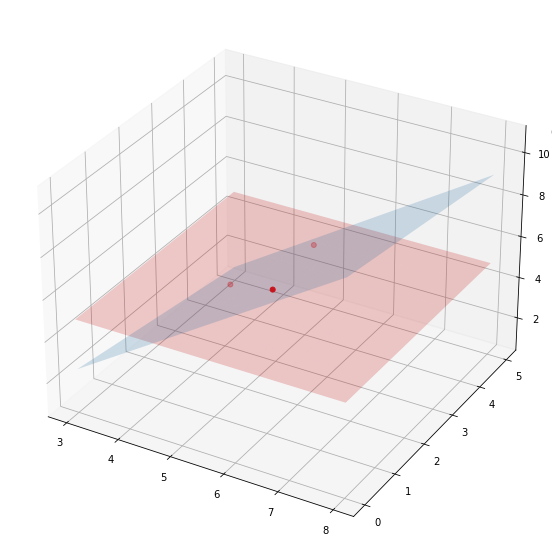

In [613]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
x1_coords = np.linspace(3, 8, 9)
x2_coords =  np.linspace(0, 5, 7).T

#a, b = np.meshgrid(x1_coords, x2_coords, sparse=True)
#x_for_predicting = np.array(np.meshgrid(x1_coords, x2_coords)).T.reshape(-1, 2)
from sklearn.utils.extmath import cartesian
x_for_predicting = cartesian([x1_coords, x2_coords])

# predict y_pred
y_pred = lm.predict(x_for_predicting)
print( lm.score(x_for_predicting, y_pred))
# y_pred should be 2 dimensional respective to the inputs
# hence transformation : => coordinates grid => then T
y_pred = y_pred.reshape(len(x1_coords), len(x2_coords)).T
y_mean = np.tile(y.mean(), reps=(len(x1_coords), len(x2_coords))).T

ax = fig.add_subplot(projection='3d')
ax.scatter(x[:, 0], x[:, 1], y, marker='.', color='red', s=100)
ax.plot_surface(*np.meshgrid(x1_coords, x2_coords), y_pred, alpha=0.2)
ax.plot_surface(*np.meshgrid(x1_coords, x2_coords), y_mean, alpha=0.2, color='red')

In [621]:
changing_nb_of_features = range(1,200,10)
xi_randoms_data_point = np.random.uniform(0, 10, size=(100, 200))
y_randoms_data_point = np.random.uniform(0, 10, size=(100,))
for i in changing_nb_of_features:
    lm = LinearRegression()
    xi_train, xi_test, yi_train, yi_test = \
            train_test_split(xi_randoms_data_point[:, :i], 
                             y_randoms_data_point, 
                             random_state=1234)
    lm.fit(xi_train, yi_train)
    print("nb features: {}, score on test: {}\t, on train: {}".format(
            i, round(lm.score(xi_test, yi_test),3), lm.score(xi_train, yi_train)))

nb features: 1, score on test: -0.017	, on train: 0.02229306156403521
nb features: 11, score on test: -0.314	, on train: 0.2009091438607158
nb features: 21, score on test: -0.669	, on train: 0.2596417503392714
nb features: 31, score on test: -1.299	, on train: 0.3921095720388704
nb features: 41, score on test: -1.742	, on train: 0.6088360328426371
nb features: 51, score on test: -2.376	, on train: 0.7442686557239004
nb features: 61, score on test: -4.179	, on train: 0.8214859039888791
nb features: 71, score on test: -75.92	, on train: 0.9518660637721018
nb features: 81, score on test: -11.977	, on train: 1.0
nb features: 91, score on test: -5.209	, on train: 1.0
nb features: 101, score on test: -3.804	, on train: 1.0
nb features: 111, score on test: -3.03	, on train: 1.0
nb features: 121, score on test: -1.153	, on train: 1.0
nb features: 131, score on test: -1.032	, on train: 1.0
nb features: 141, score on test: -0.993	, on train: 1.0
nb features: 151, score on test: -1.041	, on train

$R^2$ compares the fit of the model with that of a horizontal straight line representing the mean of the data y (the null hypothesis) i.e. the outcome y is constant for all x. If the fit is worse, the $R^2$ can be negative.

making sense of [dot product](https://math.stackexchange.com/questions/348717/dot-product-intuition)

That was an example of fitting a linear model using OLS method, making the assumption the outcome variable y is assumed to have a linear relationship with the feature(s) x(s)

You've maybe heard that the OLS estimator is **BLUE**, which stands for **Best Linear Unbiased Estimator**.<br>

Let's say the **unobservable function is assumed to be of the form** $f(x) = y + \beta_1{x_1} + \varepsilon$ where $\varepsilon$ is the error term.<br>

(Here $\varepsilon$ is a catch-all variable even for the population model that *may* include among others: variables omitted from the model, unpredictable effects, measurement errors, and omitted variables, as there is always some kind of irreducible or unknown randomness [error term](https://stats.stackexchange.com/questions/129055/understanding-the-error-term) ([here too](https://stats.stackexchange.com/questions/408734/is-the-difference-between-the-residual-and-error-term-in-a-regression-just-the-a))). <br>

Then: the **OLS estimator** is **unbiased** (the expected value from the $\hat{\beta}s$ among multiple subsets from the population is assumed to be the true $\beta_1$ of the population) and of **minimum sampling variance** (how jumpy each $\beta_1$ is from one data subset to the other) if the Gauss–Markov theorem's assumptions are met:
- equal variances of the errors
- expected value of the errors is 0
- errors uncorrelated with the [predictors](https://stats.stackexchange.com/questions/263324/how-can-the-regression-error-term-ever-be-correlated-with-the-explanatory-variab)

(Warning: as a result of applying the OLS method the residuals will be uncorrelated, but the error terms might not have been at [first uncorrelated](https://stats.stackexchange.com/questions/263324/how-can-the-regression-error-term-ever-be-correlated-with-the-explanatory-variab) (violating the assumptions of linear regression))

In [748]:
from matplotlib import gridspec

In [752]:
import random

In [904]:
import seaborn as sns
from scipy import stats

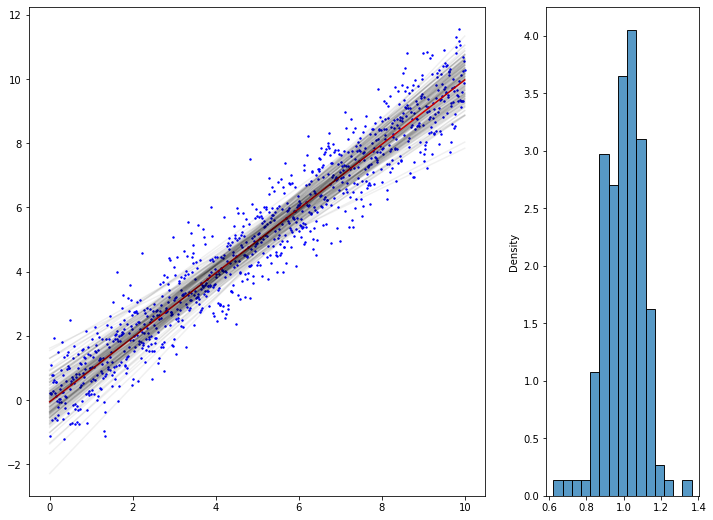

In [938]:
grid = gridspec.GridSpec(1,2, width_ratios=[3,1])
fig_reg = plt.Figure(figsize=(12,9))

ax0 = fig_reg.add_subplot(grid[0])

x_lin = np.linspace(0, 10, 1000)
y_lin = np.random.normal(x, scale=0.8)

x_lin = x_lin[:,np.newaxis]

ax0.scatter(x_lin, y_lin, color="blue", label="population data", s=2)
ax0.plot(x_lin, LinearRegression().fit(x_lin, y_lin).predict(x_lin),
         color='r', label='fitted regression line')

# saving "population true beta1" under assumption of a linear model:
beta = LinearRegression().fit(x_lin, y_lin).coef_

# picking up 10x10 points from the population, by simple sampling without replacement,
# and fitting a regression line for each of those subsets
# saving the betas_1 in dictionary
betas_1 = []
for subset_number, i_ in enumerate(np.random.randint(0, len(x_lin), size=(150,10))):
    # linear regression on the subset
    lm_subset = LinearRegression().fit(x_lin[i_,:], y_lin[i_])
    # plot
    ax0.plot(x_lin, lm_subset.predict(x_lin),
         color='black', alpha=0.06, label='fitted regression line {}'.format(subset_number))
    # saving the beta_1
    betas_1.append(lm_subset.coef_[0])
    
ax1 = fig_reg.add_subplot(grid[1])
#sns.histplot(betas_1, ax=ax1)
#sns.distributions
sns.histplot(betas_1, kde = False, stat='density', ax=ax1)
x_coords = np.arange(-1,1,0.001)
y_normal_density = stats.norm.pdf(x_coords, loc=beta, scale=1/150)
#ax1.plot(x_coords, y_normal_density, 'r', lw=2)

fig_reg

some other ressources from [Stanford Uni](https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf)

[linear regression expressed as conditional means](https://stats.stackexchange.com/questions/220507/linear-regression-conditional-expectations-and-expected-values)

### Let's take some other data example

In [2171]:
x = np.linspace(0, 2*np.pi, 100)
y = np.random.normal(np.sin(x), scale=0.4)

In [1680]:
%matplotlib inline

<ipython-input-2172-57d06bb97c23>:4: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.tight_layout()


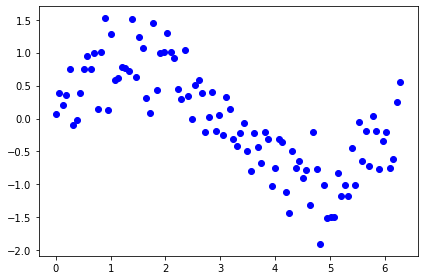

In [2172]:
fig = plt.Figure()
ax = fig.add_subplot()
ax.scatter(x,y, color='b')
fig.tight_layout()
fig

Is the underlying unobservable function linear ? it seems not...<br>
Let's say we know everything, that this function is the sinus

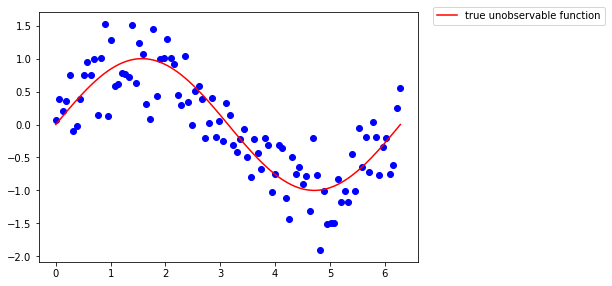

In [2173]:
ax.plot(x, np.sin(x), color='r', label="true unobservable function")
fig.legend(loc='upper left', bbox_to_anchor=(1, 1)) #upper left is placed at x=1 y=1 on the figb
fig

What if we tried to fit a linear model, assuming the unobservable function is linear in its coefficient (which is totally not the case) ?

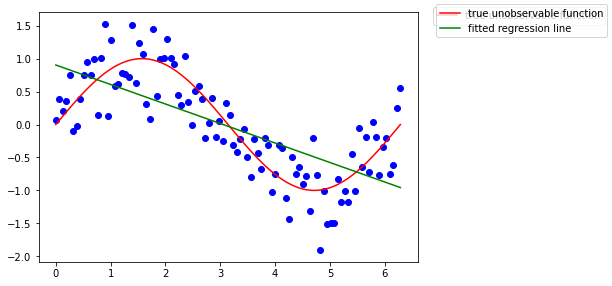

In [2174]:
lm = LinearRegression()
lm.fit(x[:, np.newaxis], y)
ax.plot(x, lm.predict(x[:, np.newaxis]), color='g', label='fitted regression line')
fig.legend()
fig

Recall the OLS estimator being **BLUE**? Well it is indeed, if the parameter model can be assumed as linear, that is, the assumptions of the Gauss-Markov model [are met](https://statisticsbyjim.com/regression/gauss-markov-theorem-ols-blue/). Here the model estimates are clearly biased.



-0.0023175740735309645


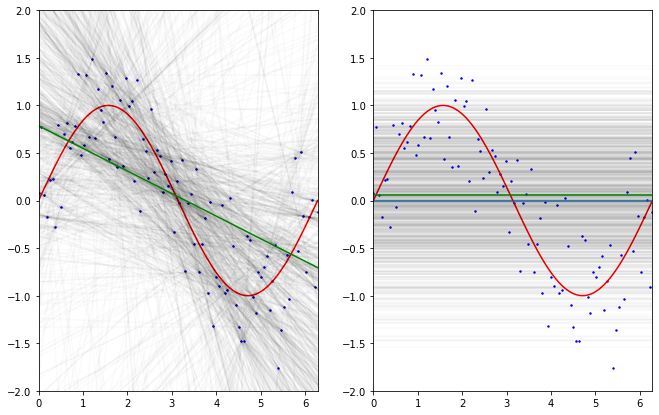

In [1212]:
# grid and figure
grid = gridspec.GridSpec(1,2, width_ratios=[2,2])
fig_sin = plt.Figure(figsize=(11,7))
## PLOT 1
# the data
ax = fig_sin.add_subplot(grid[0])
ax.scatter(x, y, color="b", label="population data", s=2)
ax.plot(x, np.sin(x), color='r', label="true unobservable function")

# picking up 1000x2 points (indexes) from the population, by simple sampling without replacement,
# and fitting a regression line for each of those subsets
betas_1 = []
intercepts = []
tirages = np.random.randint(0, len(x), size=(5000,2))
for number, i_ in enumerate(tirages):
    # linear regression on the subset
    lm_subset = LinearRegression(fit_intercept=True).fit(x[i_, np.newaxis], y[i_])
    # each 5 sampling (to not overload the graph)
    if number % 5 == 0:     
        # plot
        ax.plot(x, lm_subset.predict(x[:, np.newaxis]),
             color='black', alpha=0.02)
    # saving the beta_1
    betas_1.append(lm_subset.coef_[0])
    intercepts.append(lm_subset.intercept_)
ax.set_ylim(-2,2)
ax.set_xlim(0,2*np.pi)

ax.plot(x, np.mean(intercepts) + np.mean(betas_1)*x, color='g', label='"mean" of the fitted regression models')


## PLOT 2
ax = fig_sin.add_subplot(grid[1])
ax.scatter(x, y, color="b", label="population data", s=2)
ax.plot(x, np.sin(x), color='r', label="true unobservable function")

# simple "dummy" model (applied on all the data)
ax.plot(x, np.tile(np.mean(y), reps=(len(x),)))
print( np.mean(y) )

# picking up 1000x2 points (indexes) from the population, by simple sampling without replacement,
# and fitting a regression line for each of those subsets
means = []
tirages = np.random.randint(0, len(x), size=(1000,2))
for i_ in tirages:
    # linear regression on the subset
    dummy_model_y = np.tile(np.mean(y[i_]), reps=len(x))
    # plot
    ax.plot(x, dummy_model_y, color='black', alpha=0.02)
    # save means
    means.append(dummy_model_y[0])
ax.set_ylim(-2,2)
ax.set_xlim(0,2*np.pi)

ax.plot(x, np.tile(np.mean(means), reps=(len(x),)), color='g', label='"mean" of the fitted dummy models')


fig_sin
#fig_sin.legend(loc='upper left', bbox_to_anchor=(1, 1)) #upper left is placed at x=1 y=1 on the figb

The above simulation is inspired from ***Caltech ML course by Yaser Abu-Mostafa (Lecture 8 - Bias-Variance Tradeoff)***

What if we took a rather "dummy" model doing nothing more than computing the mean of 2 $y$ values for some given realizations of $X$: $x$ then:
- we see the dummy trained models (on 2 data points) are more stable in their "predictions" mainly due to the fact they are simpler models, not affected / taking into account some of the variations in the data.
- the regression models (trained on 2 data points) in average do perform better in trying to predict $y$ values, although the performance of the model are less stable from one another.

This is also called the **Bias-Variance trade-off.**

- The **Bias** can be seen as the error made by **simplifying assumptions** e.g. assuming there is a linear relationship where the unobservable function do have non linearities, there will be in average an error of mismatch as the estimated model will not be sensible to theses variations.
- The **Variance** of the model show how much the model, trained on some other data, (here with 2 data points each time) will vary around the mean.

The more complex the model gets, the **more it will capture data tendencies**, but **this acquired sensibility will make the model more 'variable' in its parameters on different training sets**.
The less complex (with **huge erroneous assumptions**) the model is, the **less sensible it is to capture the relations between the features and the output** but it won't be affected to different training sets.

Actually... When we compute the performance of both of these models using the MSPE.
$$ MSPE(L) = E[  ( g(x_i) - \hat{g}(x_i) )^2 ] $$

The former formula can be decomposed into 3 terms:



<img src="td4_ressources/bias_variance.png" width="50%">

Having a high bias or a high variance, to the extreme, can be a real issue, we will see later why.

By the way the regression model is still very biased and we may be able to reduce both the variance and bias by using another family of model.

Let's take a **polynomial model** instead (locally it will aproximate well, although it is a bad way of approximating the periodicity of the sine function).

To create this model, we are actually going to do some light feature engineering, in that case create new polynomial features from the original ones 

In [2175]:
from sklearn.preprocessing import PolynomialFeatures
poly3 = PolynomialFeatures(degree=3)
x_new = poly3.fit_transform(x[:, np.newaxis])

We hence created **4 features out of one**, which hold the attributes: $constant, x, x**2, x**3$

In [2176]:
x_new.shape

(100, 4)

In [2177]:
x[:4]

array([0.        , 0.06346652, 0.12693304, 0.19039955])

In [2178]:
x[:4]**2

array([0.        , 0.004028  , 0.016112  , 0.03625199])

In [2179]:
x[:4]**3

array([0.        , 0.00025564, 0.00204514, 0.00690236])

In [2180]:
x_new[:4, :]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 6.34665183e-02, 4.02799894e-03, 2.55643068e-04],
       [1.00000000e+00, 1.26933037e-01, 1.61119958e-02, 2.04514455e-03],
       [1.00000000e+00, 1.90399555e-01, 3.62519905e-02, 6.90236284e-03]])

But we will now still use the **linear regression, using those new features** !<br>
Indeed the relation is still **linear in its coefficient** $\beta$s, although not with respect to its features.

Be aware though that this can be affected by the curse of dimensionality, as the number of new features grows much faster than linearly with the growth of degree of polynomial.

Let's assume then the true relationship (at least locally) is $$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3  x^3$$

In [2181]:
lm_poly = LinearRegression().fit(x_new, y) # x_new is already 2D data

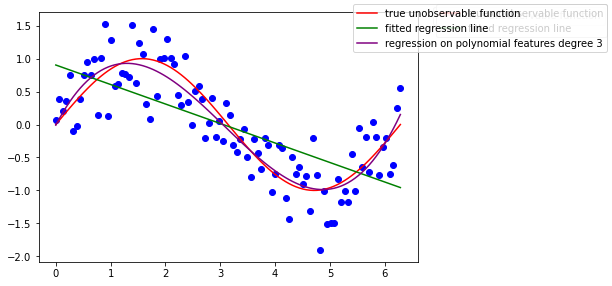

In [2182]:
ax = fig.gca()
ax.plot(x, lm_poly.predict(x_new), color='purple', label='regression on polynomial features degree 3')
fig.legend()
fig

We get back *somehow* the **Taylor expansion** coeficients locally at the order 3

$$ sin(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} - ...  $$

In [1588]:
lm_poly.coef_ # first is the intercept due to the poly transform

array([ 0.        ,  1.6268111 , -0.78227311,  0.08384429])

By the way, as highlighted in the sklearn docs, when you have multiple data processing and modelisation you can chain all those functions / pipe them using the Pipeline object

In [1589]:
from sklearn.pipeline import Pipeline

In [1659]:
# Intermediate steps of the pipeline must be 'transforms', that is, they
# must implement fit and transform methods.
# The final estimator only needs to implement fit.
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linear', LinearRegression())
])

In [1660]:
# The purpose of the pipeline is to assemble several steps that can be
# cross-validated together while setting different parameters.
# For this, it enables setting parameters of the various steps using their
# names and the parameter name separated by a '__',
pipeline.set_params(poly__degree=5)

# Fit all the transforms one after the other and transform the
# data, then fit the transformed data using the final estimator

pipeline.fit(x[:, np.newaxis], y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=5)),
                ('linear', LinearRegression())])

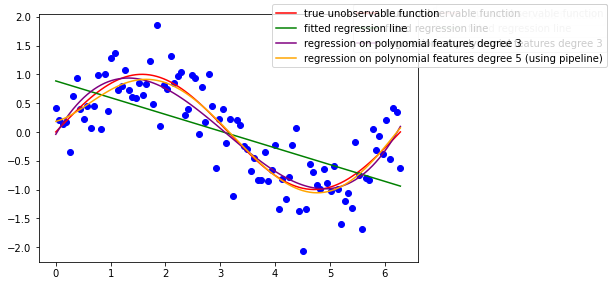

In [1661]:
ax = fig.gca()
ax.plot(x, pipeline.predict(x[:,np.newaxis]), color='orange', label='regression on polynomial features degree 5 (using pipeline)')
fig.legend()
fig

So far these are the features that we used to fit a linear model:

We started doing feature engineering, why not adding other features such as:
   * sqrt(x)
   * exp(x)
   * log(x+1)
   * 1/(x+1)
   * cos(x)
   * sin(x)
for all types of "x" (x, x*2, x*3)

In [2183]:
from sklearn.base import BaseEstimator, TransformerMixin

class AddFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, where_x, functions=None):
        self.functions = functions
        self.where_x = where_x
    def fit(self, X, y):
        return self
    def transform(self, X):
        # .T to iterate over the cols of the array
        # vstack to stack vertically row by row
        # then .T to go back to the initial shape
        # not taking the intercept (index 0)
        #if self.intercept_exist:
        #    start = 1
        #    x_ = X[:,start:]
        #else:
        #    start = 0
        #    x_ = X
        x_ = X[:, [self.where_x]].copy()
        self.funcs_applied = ["{}".format(func.__name__) for func in self.functions]
        cols =  np.hstack([func(x_) for func in self.functions])
        return np.hstack([X, cols])

In [2184]:
class BetterPipeline(Pipeline):
    """ Since pipeline.transform does work only when all estimators are transformers of the data,
    and mostly i'm fitting a model as last estimator, i prefer creating a just_transform method for that"""
    def just_transforms(self, X):
        """Applies all transforms to the data, without applying last 
           estimator.

        Parameters
        ----------
        X : iterable
            Data to predict on. Must fulfill input requirements of first step of
            the pipeline.
        """
        Xt = X
        for name, transform in self.steps[:-1]:
            Xt = transform.transform(Xt)
        return Xt

In [2185]:
funcs = [np.sin, np.cos, np.exp]

pipeline = BetterPipeline([
    ('adding_features', AddFeatures(where_x=0)),
    ('poly', PolynomialFeatures(degree=2, interaction_only=True)),
    ('linear_reg', LinearRegression(fit_intercept=False))
])

pipeline.set_params(adding_features__functions=funcs)
pipeline.fit(x[:, np.newaxis], y)

BetterPipeline(steps=[('adding_features',
                       AddFeatures(functions=[<ufunc 'sin'>, <ufunc 'cos'>,
                                              <ufunc 'exp'>],
                                   where_x=0)),
                      ('poly', PolynomialFeatures(interaction_only=True)),
                      ('linear_reg', LinearRegression(fit_intercept=False))])

let's build again a linear model out of them:

In [2186]:
pipeline.named_steps.adding_features.funcs_applied

['sin', 'cos', 'exp']

In [2187]:
x[:,np.newaxis][:4]

array([[0.        ],
       [0.06346652],
       [0.12693304],
       [0.19039955]])

In [2188]:
pipeline.just_transforms(x[:, np.newaxis])[:4].shape
# cst, x1, x2, x3, f1(x1), f2(x1),..., f5(x1), ..., f5(x3)

(4, 11)

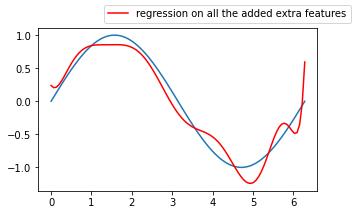

In [2189]:
fig = plt.Figure()
ax = fig.gca()
ax.plot(x, np.sin(x))
ax.plot(x, pipeline.predict(x[:, np.newaxis]), color='r', 
        label='regression on all the added extra features')
fig.legend()
fig.set_size_inches(5,3)
fig

In [2190]:
params = dict(zip(["x0", "x1", "x2", "x3"], ["x"]+pipeline.named_steps.adding_features.funcs_applied))
list_of_features = []
for feature in pipeline.named_steps.poly.get_feature_names():
    for el in params:
        feature = feature.replace(el, params.get(el))
    list_of_features.append(feature)

In [2197]:
params

{'x0': 'x', 'x1': 'sin', 'x2': 'cos', 'x3': 'exp'}

In [2191]:
results = dict(zip(list_of_features, pipeline.named_steps.linear_reg.coef_))
results

{'1': 237.5537660813595,
 'x': -42.176913529594344,
 'sin': 61.83606673496575,
 'cos': -218.42791323834305,
 'exp': -20.44189022468796,
 'x sin': -92.94656937907925,
 'x cos': 11.742334620526949,
 'x exp': 3.0572435486793452,
 'sin cos': -14.204239122902498,
 'sin exp': -2.296926010011112,
 'cos exp': 1.5551590338739443}

/Users/lucbertin/.pyenv/versions/3.8.4/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '1'),
  Text(1, 0, 'x'),
  Text(2, 0, 'sin'),
  Text(3, 0, 'cos'),
  Text(4, 0, 'exp'),
  Text(5, 0, 'x sin'),
  Text(6, 0, 'x cos'),
  Text(7, 0, 'x exp'),
  Text(8, 0, 'sin cos'),
  Text(9, 0, 'sin exp'),
  Text(10, 0, 'cos exp')])

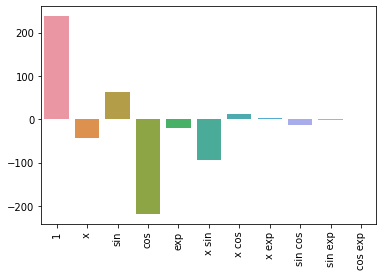

In [2192]:
sns.barplot(list(results.keys()), list(results.values()))
plt.xticks(rotation=90)

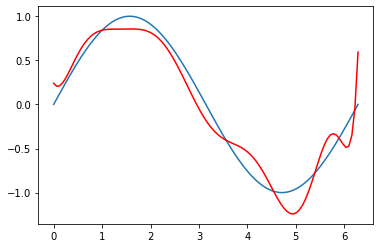

In [2194]:
plt.plot(x, np.sin(x))
plt.plot(x, 237.5537660813595
         -42.176913529594344*x
         +61.83606673496575*np.sin(x)
         -218.42791323834305*np.cos(x)
         -20.44189022468796*np.exp(x)
         -92.94656937907925*np.sin(x)*x
         +11.742334620526949*np.cos(x)*x
         +3.0572435486793452*np.exp(x)*x
         -14.204239122902498*np.sin(x)*np.cos(x)
         -2.296926010011112*np.sin(x)*np.exp(x)
         +1.5551590338739443*np.cos(x)*np.exp(x)
         , color='r', 
        label='regression on all the added extra features')



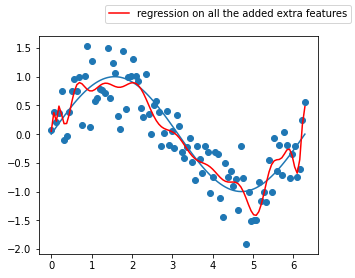

In [2213]:
def inverse(x):
    return 1/(1+x)
def log_and_1(x):
    return np.log(1+x)
funcs = [np.sin, np.cos, np.exp, inverse, log_and_1, np.sqrt]

pipeline.set_params(adding_features__functions=funcs,
                   poly__degree=4, poly__interaction_only=False)
pipeline.fit(x[:, np.newaxis], y)

params = dict(zip(["x0", "x1", "x2", "x3", "x4", "x5"], ["x"]+pipeline.named_steps.adding_features.funcs_applied))
list_of_features = []
for feature in pipeline.named_steps.poly.get_feature_names():
    for el in params:
        feature = feature.replace(el, params.get(el))
    list_of_features.append(feature)

    fig = plt.Figure()
ax = fig.gca()
ax.plot(x, np.sin(x))
ax.plot(x, pipeline.predict(x[:, np.newaxis]), color='r', 
        label='regression on all the added extra features')
ax.scatter(x, y)
fig.legend()
fig.set_size_inches(5,4)
fig

Does these models look really better than the previous 3 degree polynomial one without interaction terms ? 🤔

This model seems so complex that it has actually started learning the **noise in the training data**, this is a great example where the bias is low, but the variance is very high, we call this phenomenon **overfitting**.

The inverse is **underfitting** ("immutable" model due to its simplicity built from exagerated reductive assumptions)

To assess **overfitting**, one can use **cross-validation** techniques !

By **splitting** the dataset into training and test set, you can validate whether your model will **generalize** well to unseen data. Hence if the model has started learning the noise in the training data, you should expect that:

$$ MSPE(training_{data}) < MSPE(test_{data}) $$

In [2320]:
# set indexes for the training data (we chose 75% of the data for training, the rest as test set)
train_index = list(set(np.random.choice(len(x_after_feature_engineering), size=75, replace=False)))
test_index = list(set(range(100)) - set(train_index))
# the training 
X_train, y_train = x_after_feature_engineering[train_index], y[train_index]
X_test, y_test = x_after_feature_engineering[test_index], y[test_index]

MSE train/test with the pipeline 0.16079231932432714, 0.4153474547263636
MSE train/test with poly and linear regression 0.14298871828570994, 0.11952029155922295


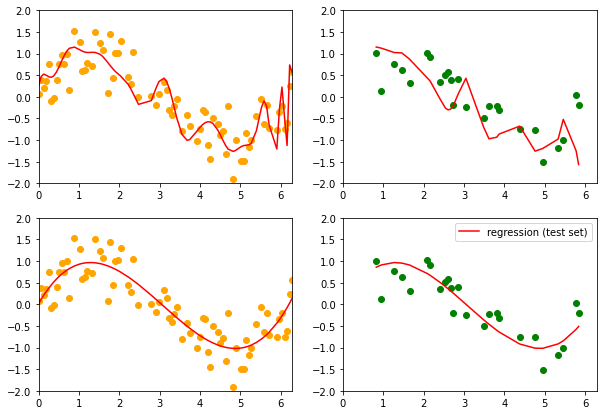

In [2333]:
# train the big pipeline on the training set
pipeline.fit(X_train, y_train)

# compute MSPE for both
MSPE_train = mean_squared_error(pipeline.predict(X_train), y_train)
MSPE_test = mean_squared_error(pipeline.predict(X_test), y_test)
print("MSE train/test with the pipeline {}, {}".format(MSPE_train, MSPE_test))

# just a linear model with regression on poly features degree 3
poly = PolynomialFeatures(degree=3, include_bias=False)
x2 = poly.fit_transform(x[:, np.newaxis])
lm = LinearRegression().fit(x2[train_index], y[train_index])

# compute MSPE for both
MSPE_train = mean_squared_error(lm.predict(x2[train_index]), y_train)
MSPE_test = mean_squared_error(lm.predict(x2[test_index]), y_test)
print("MSE train/test with poly and linear regression {}, {}".format(MSPE_train, MSPE_test))

# show predictions on training and test data
fig, axes = plt.subplots(figsize=(10,7), ncols=2, nrows=2)
#axes[0].plot(x[train_index], np.sin(x[train_index]))
#axes[1].plot(x[test_index], np.sin(x[test_index]))

axes[0,0].scatter(x[train_index], y[train_index], color='orange')
axes[0,1].scatter(x[test_index], y[test_index], color='g')

axes[0,0].plot(x[train_index], pipeline.predict(X_train), color='r', 
        label='regression (train set)')
axes[0,1].plot(x[test_index], pipeline.predict(X_test), color='r', 
        label='regression (test set)')

axes[1,0].scatter(x[train_index], y[train_index], color='orange')
axes[1,1].scatter(x[test_index], y[test_index], color='g')




axes[1,0].plot(x[train_index], lm.predict(x2[train_index]), color='r', 
        label='regression (train set)')
axes[1,1].plot(x[test_index], lm.predict(x2[test_index]), color='r', 
        label='regression (test set)')

for ax in axes.flatten():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-2, 2)

plt.legend()
plt.show()

<img src="td4_ressources/img_learning_curve.png" width="65%" align="left">

How to make our model **simpler**, that is **introduce more bias** to **lower the variance**, when we have no idea of which of the coefficients should be discarded from the analysis ? (also when we can't simply check p-values from a regression analysis because 1. they could be useless or misleading if the assumptions are not met, 2. one could use something else than a regression model): **regularization** !

(Remarque : A ce stade, nous devrions réaliser une sélection de variables (approche fondée sur le F-partiel ou s’appuyant sur l’optimisation des critères AIC / BIC par exemple) avant de procéder à la prédiction. Nous choisissons néanmoins de les conserver toutes dans ce tutoriel pour simplifier la démarche mais:
The interpretation of a regression coefficient is that it represents the mean change in the dependent variable for each 1 unit change in an independent variable when you hold all of the other independent variables constant. That last portion is crucial for our further discussion about multicollinearity
The idea is that you can change the value of one independent variable and not the others. However, when independent variables are correlated, it indicates that changes in one variable are associated with shifts in another variable.
)
prediction given by OLS model should not be affected by multicolinearity, as overall effect of predictor variables is not hurt by presence of multicolinearity. It is interpretation of effect of individual predictor variables that are not reliable when multicolinearity is present

# Regularization

<img src="td4_ressources/img_Ridge_Bias_variance_trade_off.png" width="65%" align="left">

<img src="td4_ressources/img_regularization_Christoph_Wursch.png" width="65%" align="left">

In [2195]:
x_after_feature_engineering = pipeline.just_transforms(x[:, np.newaxis])

In [2258]:
xnz = StandardScaler().fit_transform(x_after_feature_engineering)

In [2259]:
LinearRegression(fit_intercept=False).fit(xnz,y).coef_

array([    0.        ,   -77.2693271 ,    43.50552929,  -155.20682759,
       -2625.68503844,  -213.7164138 ,    30.97508782,  2377.71869959,
          -4.99678403,  -143.01826552,   199.14764254])

In [2215]:
from sklearn.linear_model import Lasso

In [2243]:
regLasso1 = Lasso(fit_intercept=False, normalize=False, alpha=1)
regLasso1.get_params()

{'alpha': 1,
 'copy_X': True,
 'fit_intercept': False,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [2244]:
regLasso1.fit(x_after_feature_engineering, y)
regLasso1.coef_

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.00056407, -0.        ,  0.00531828,
        0.00429535])

In [2263]:
regLasso2 = Lasso(fit_intercept=False, normalize=False, 
                  alpha=0.00001)
regLasso2.fit(x_after_feature_engineering, y)
regLasso2.coef_

/Users/lucbertin/.pyenv/versions/3.8.4/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.725850754163225, tolerance: 0.00597784722657327
  model = cd_fast.enet_coordinate_descent(


array([ 2.03166073e-01, -1.01604804e-01,  7.44627444e-01, -8.19587125e-02,
        1.30652915e-03,  6.73399699e-02,  1.84634132e-02,  5.93093705e-05,
        2.31573136e-01, -1.14008641e-03, -7.32445409e-04])

oups... seems alpha=1.0 is too big and the regularization too high!

In [2235]:
my_alphas = np.append(np.linspace(0.01, 0.25, 100), np.linspace(0.25, 0.8, 50))

In [2240]:
# lasso_path() produce the esimated coefs_ for different values of alphas:
from sklearn.linear_model import lasso_path
alpha_for_path, coefs_lasso, _ = lasso_path(x_after_feature_engineering, y, alphas=my_alphas, 
                                            tol=0.8, normalize=False, fit_intercept=False)

In [2241]:
coefs_lasso.shape

(11, 150)

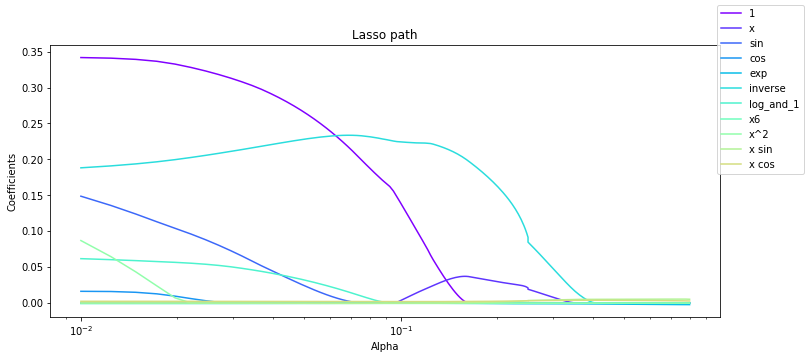

In [2242]:
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0,1,16))
fig = plt.Figure(figsize=(12,5))
ax = fig.gca()
for i in range(coefs_lasso.shape[0]): 
    ax.plot(alpha_for_path, coefs_lasso[i,:], c=colors[i], label=list_of_features[i])
ax.set_xscale('log')
ax.set_xlabel('Alpha')
ax.set_ylabel('Coefficients')
ax.set_title('Lasso path')
fig.legend()
fig

# Going back to our example

## Divide in train - test sets

In [636]:
X = california_housing.data
y = california_housing.target
X.shape, y.shape

((20640, 8), (20640,))

In [637]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
        train_test_split(X, y, random_state=1234)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [638]:
[tuple_[0]/X.shape[0] for tuple_ in (X_train.shape, X_test.shape, y_train.shape, y_test.shape)]

#### the return of the standard Scaler 

In [ ]:
performances = dict()

In [624]:
scaler   = StandardScaler().fit(X_train)
X_train  = scaler.transform(X_train)
X_test   = scaler.transform(X_test)

In [631]:
linear_model = LinearRegression(fit_intercept=False, normalize=True)
linear_model.fit(X_train, y_train)

LinearRegression(fit_intercept=False, normalize=True)

In [632]:
linear_model.score(X_test, y_test)

-2.630399387268966

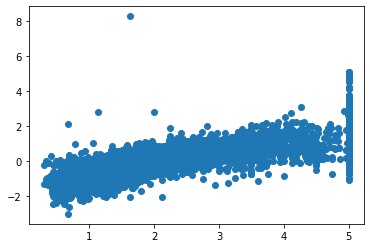

In [461]:
## Predictions against True values
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x=y_test, y=linear_model.predict(X_test))

In [443]:
linear_model.coef_

array([ 4.40921745e-01,  9.73014997e-03, -1.16418460e-01,  7.21082459e-01,
       -4.13919790e-06, -3.85206103e-03, -4.14706815e-01, -4.29215601e-01])

In [446]:
performances[linear_model] = linear_model.score(X_test, y_test)

But train/test split does have its dangers — what if the split we make isn’t random? 

Instead of algo1 we can use directly LinearRegression() as it will fit it anyway on the different splits

In [447]:
performances

{LinearRegression(): 0.5951538103198971}

## Ridge and Lasso regressions

This is an example of hyperparametrized model.
The hyperparameter is a regularization parameter here.

For greater values of $\alpha$, the $\beta s$ will get shrunk towards 0 as we seek to find the $\beta s$ which minimize the overall equation where the 2nd part is getting more and more weight due to $\alpha$

In [ ]:
as $\alpha$ increases, the b

## Mettre tout ceci sous forme d'une fonction

In [1179]:
def get_score(algorithme, X_train, X_test, y_train, y_test, display_graph=False, display_options=True):
    if display_options:
        print("fitting :\n"+ str(algorithme))
        print("X_train:{} , X_test:{} ,  y_train:{} ,  y_test:{}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))
    modele = algorithme.fit(X_train, y_train)
    score  = modele.score(X_test, y_test)
    if display_graph:
        import matplotlib.pyplot as plt
        plt.scatter(x=y_test, y=algorithme.predict(X_test)) ## Predictions against True values
    return score

In [1180]:
get_score(LinearRegression(), *train_test_split(X, y, random_state=1234))

fitting :
LinearRegression()
X_train:(15480, 8) , X_test:(5160, 8) ,  y_train:(15480,) ,  y_test:(5160,)


0.5951538103198971

## Avons-nous besoin de Standardizer les valeurs ? 

In [1181]:
from sklearn.preprocessing import StandardScaler
scaler   = StandardScaler().fit(X_train)
X_train  = scaler.transform(X_train)
X_test   = scaler.transform(X_test)

In [1182]:
pd.DataFrame(X_train)

0         1         2         3         4         5         6  \
0     -0.354739 -1.884591  0.088138 -0.087609  1.914435  0.044927 -0.494293   
1      0.127656  0.749561  0.036452 -0.287105 -0.177434 -0.061717  1.174861   
2      1.469169 -0.527604  0.916167 -0.238028  0.439605  0.014134 -0.812227   
3      0.050005  0.589915 -0.060592 -0.358913 -0.727597 -0.049610  0.969139   
4     -0.170006 -1.964414  0.360906  0.530414  0.049943 -0.056194  0.347298   
...         ...       ...       ...       ...       ...       ...       ...   
15475  0.587404 -0.607427 -1.094179 -0.558997 -1.242094 -0.115526 -0.873008   
15476 -0.585187 -1.166186  0.166960  0.190634 -0.239851 -0.059006  0.824199   
15477  0.174257  0.350447 -0.185899  0.140665 -0.311185  0.003595 -0.802876   
15478  1.477571  1.228497  0.419694 -0.263553 -0.166734 -0.044729  0.861603   
15479  0.817486 -1.964414  1.121799 -0.015848  0.897926  0.028507  1.104729   

              7  
0      0.815921  
1     -0.858112  
2      0.850901  
3     -1.287864  
4     -0.043583  
...         ...  
15475  0.666007  
15476 -0.143525  
15477  0.621033  
15478 -1.352827  
15479 -1.102971  

[15480 rows x 8 columns]

In [1183]:
get_score(LinearRegression(), X_train, X_test, y_train, y_test)

fitting :
LinearRegression()
X_train:(15480, 8) , X_test:(5160, 8) ,  y_train:(15480,) ,  y_test:(5160,)


0.5951538103198968

Pour une régression linéaire non. Expliquer pourquoi.

Mais c'est toujours mieux de le faire. Expliquer pourquoi.

## Cross validation

wikipedia
>Cross-validation,[1][2][3] sometimes called rotation estimation[4][5][6] or out-of-sample testing, is any of various similar model validation techniques for assessing how the results of a statistical analysis will generalize to an independent data set. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice. In a prediction problem, a model is usually given a dataset of known data on which training is run (training dataset), and a dataset of unknown data (or first seen data) against which the model is tested (called the validation dataset or testing set).[7][8] The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias[9] and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).

<img src="td4_ressources/img_a_10_fold_cross_validation.png" width="65%" align="left">

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

### CV parametre = nombre de folds

In [1186]:
results = cross_val_score(LinearRegression(), X, y, cv=3)
display(results, results.mean(), results.std())

array([0.55502126, 0.58837838, 0.58544641])

0.5762820158960853

0.015081199273597358

In [1187]:
results = cross_val_score(LinearRegression(), X, y, cv=5)
display(results, results.mean(), results.std())

array([0.54866323, 0.46820691, 0.55078434, 0.53698703, 0.66051406])

0.5530311140279233

0.06169160140952192

### Attention à randomly select les données !

In [1188]:
random_indexes = np.random.choice(range(0,np.size(X, axis=0)),size=np.size(X, axis=0),replace=False)
results = cross_val_score(LinearRegression(), 
                X[random_indexes,:],
                y[random_indexes],
                cv=5)
display(results, results.mean(), results.std())

array([0.60599314, 0.60012143, 0.60743432, 0.60345929, 0.59470724])

0.602343086362268

0.004554809079823222

#### mieux :

In [1189]:
results = cross_val_score(LinearRegression(), X, y, cv=KFold(shuffle=True, n_splits=5))
display(results, results.mean(), results.std())

array([0.60468889, 0.59824467, 0.57829859, 0.63738733, 0.59901735])

0.6035273665776618

0.01914463194628335

In [1190]:
def multiple_cross_val_scores(algorithme, X, y):
    import numpy as np
    results=dict()
    for kfold in range(3,100, 20):
        score = cross_val_score(algorithme, X, y,  cv = KFold(shuffle=True, n_splits=kfold), scoring='r2')
        results[kfold] = score.mean(), score.std()
    return results

In [1191]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
test = multiple_cross_val_scores(DecisionTreeRegressor(),X, y)
test = pd.DataFrame(test, index=["mean", "std"]).T
test

mean       std
3   0.596333  0.006556
23  0.605437  0.037804
43  0.610825  0.042940
63  0.606054  0.055790
83  0.611114  0.080461

In [1192]:
new_index = [str(x) + " folds" for x in test.index]
test.index = new_index

<AxesSubplot:title={'center':'Cross-validation using all data with 20640 lignes'}>

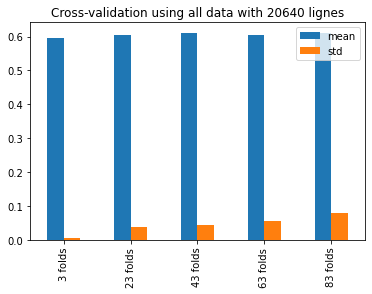

In [1193]:
test.plot(kind='bar', title='Cross-validation using all data with {} lignes'.format(X.shape[0]))

There are cases where the computational definition of R2 can yield negative values, depending on the definition used. This can arise when the predictions that are being compared to the corresponding outcomes have not been derived from a model-fitting procedure using those data. Even if a model-fitting procedure has been used, R2 may still be negative, for example when linear regression is conducted without including an intercept, or when a non-linear function is used to fit the data. In cases where negative values arise, the mean of the data provides a better fit to the outcomes than do the fitted function values, according to this particular criterion.

The constant minimizing the squared error is the mean. Since you are doing cross validation with left out data, **it can happen that the mean of your test set is wildly different from the mean of your training set**

R² = 1 - RSS / TSS, where RSS is the residual sum of squares ∑(y - f(x))² and TSS is the total sum of squares ∑(y - mean(y))². Now for R² ≥ -1, it is required that RSS/TSS ≤ 2, but it's easy to construct a model and dataset for which this is not true:

***Inspect shuffling first ! If data is sorted at first !!! *** 

### Decision Tree Regressor

In [1194]:
from sklearn.tree import DecisionTreeRegressor

In [1195]:
algorithme = DecisionTreeRegressor()
algorithme.fit(X_train, y_train)
score = algorithme.score(X_test, y_test)
performances[algorithme] = score

Criteria used for splitting

*** Credits *** : © Adele Cutler

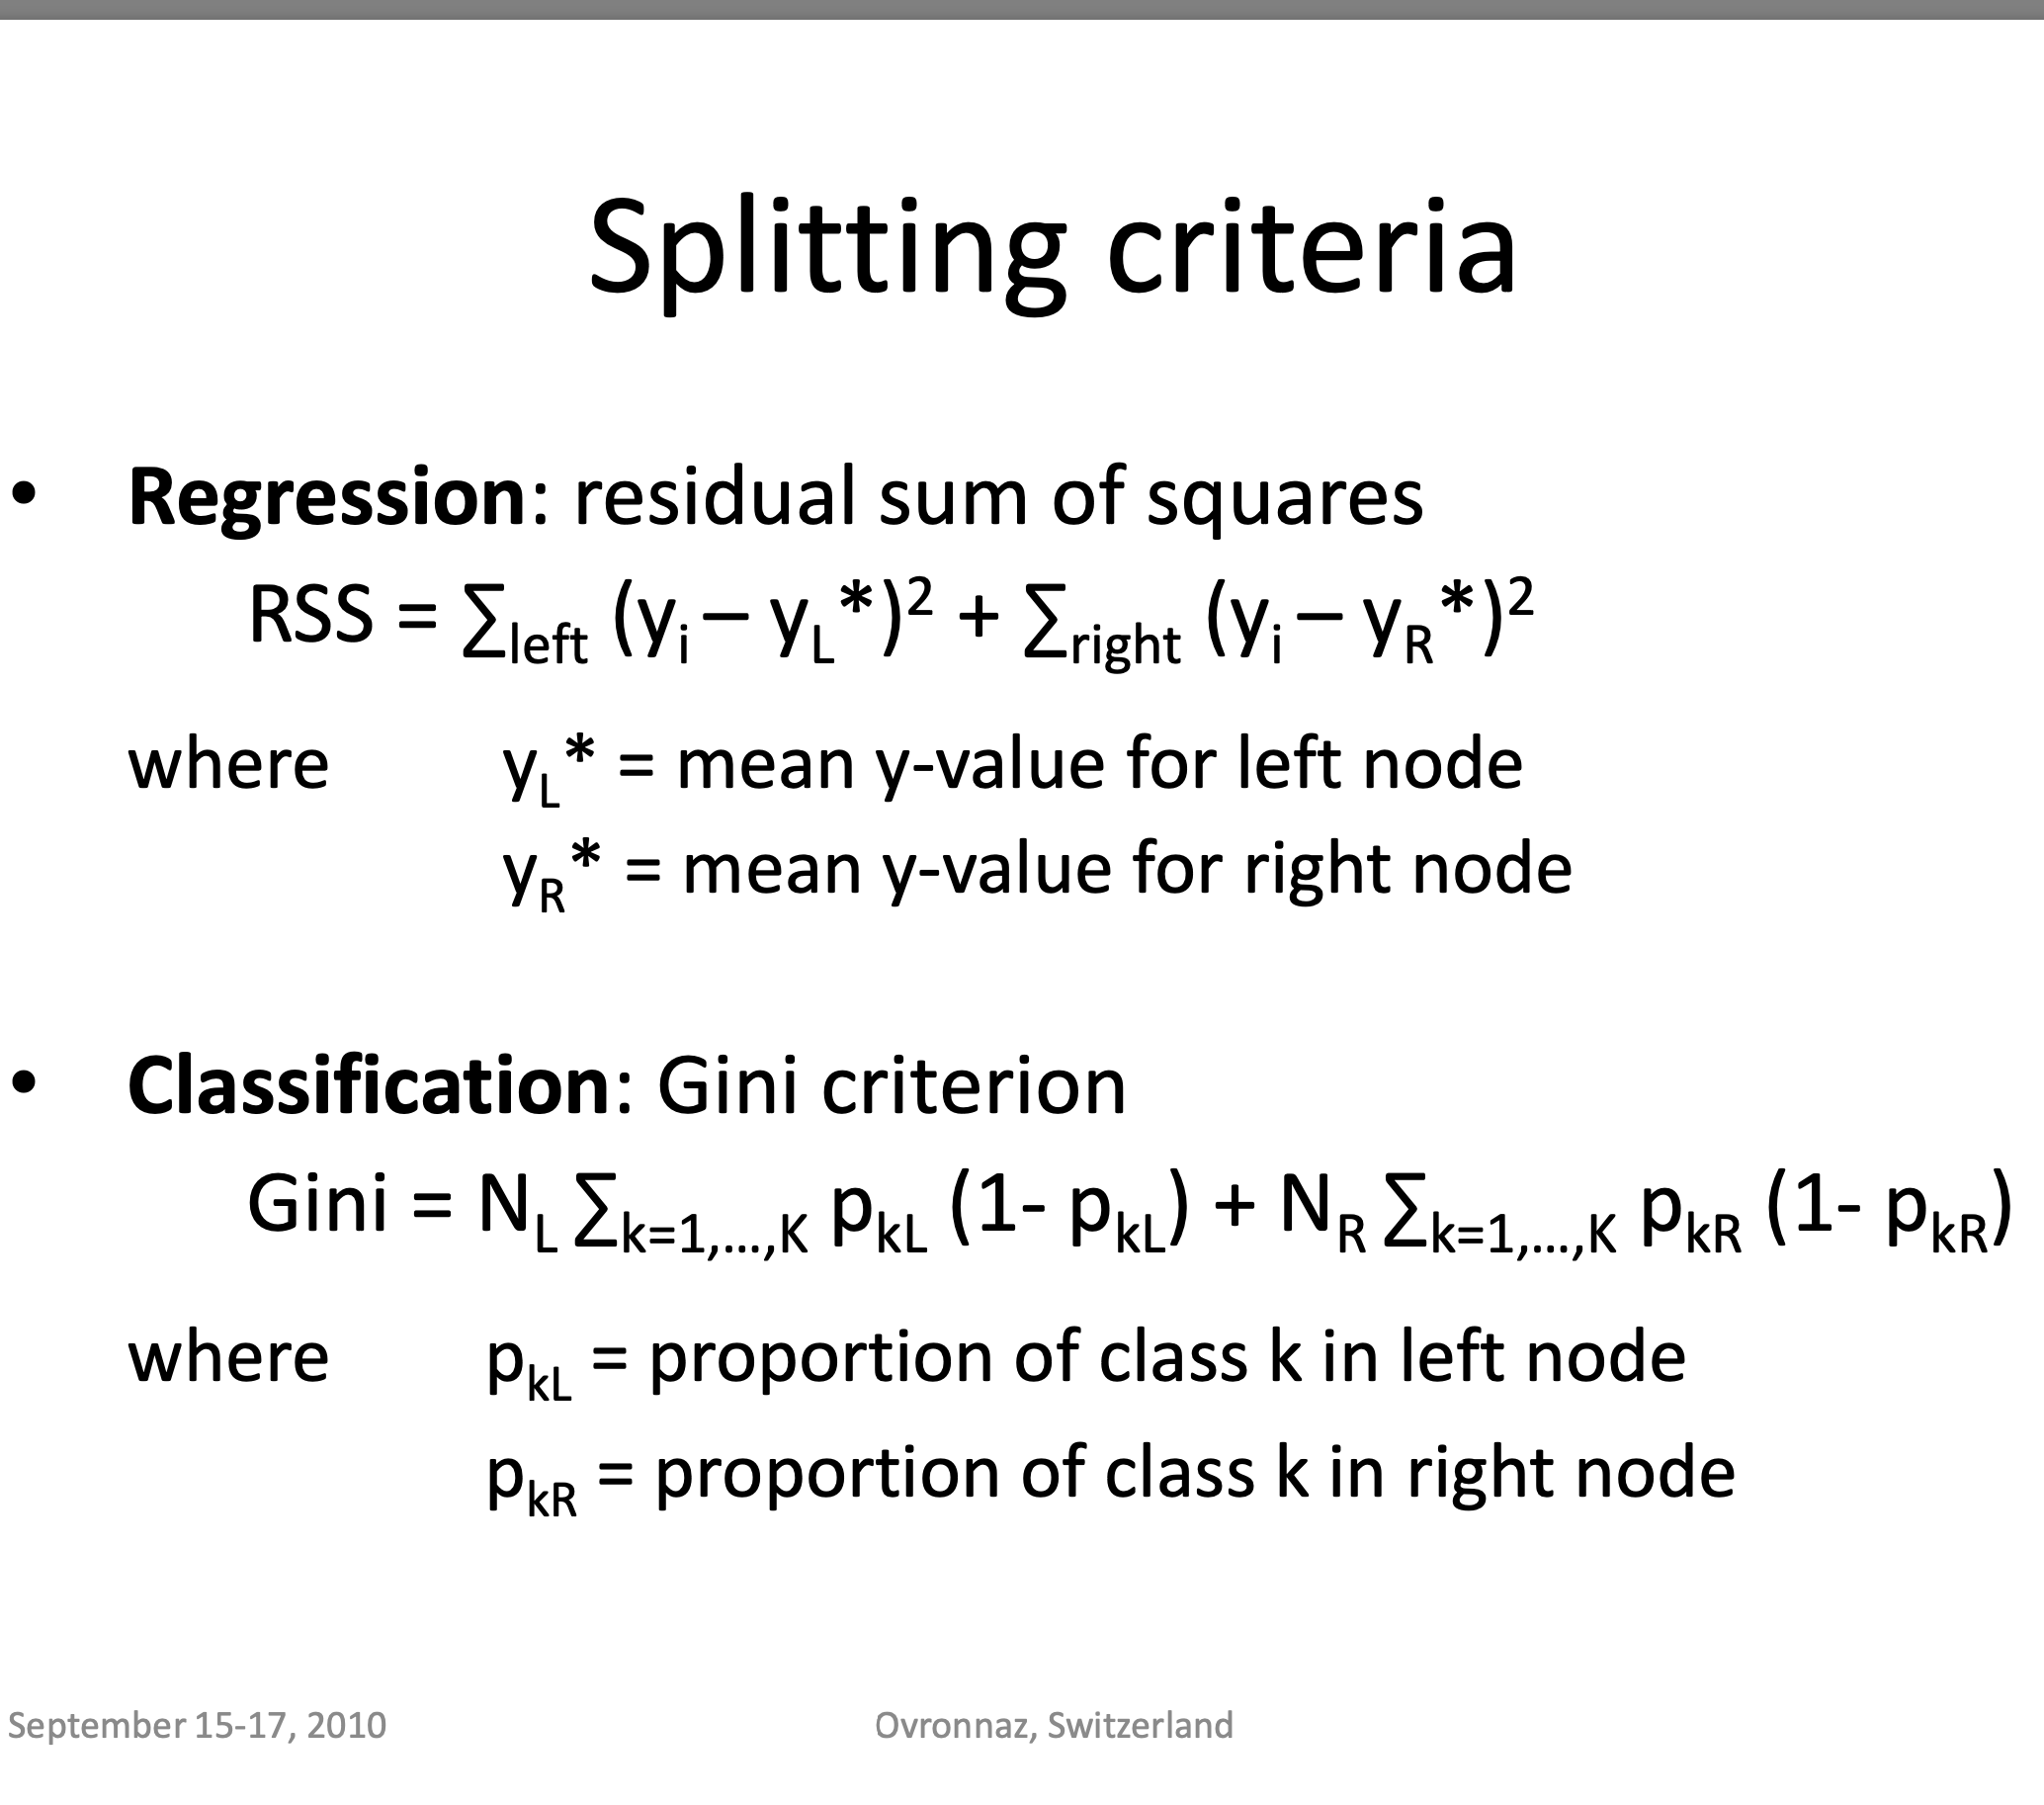

In [1196]:
Image("td4_ressources/img_DecisionTreesSplitting_Criteria_ADELE-CUTLER-Ovronnaz_Switzerland.png", width=400)

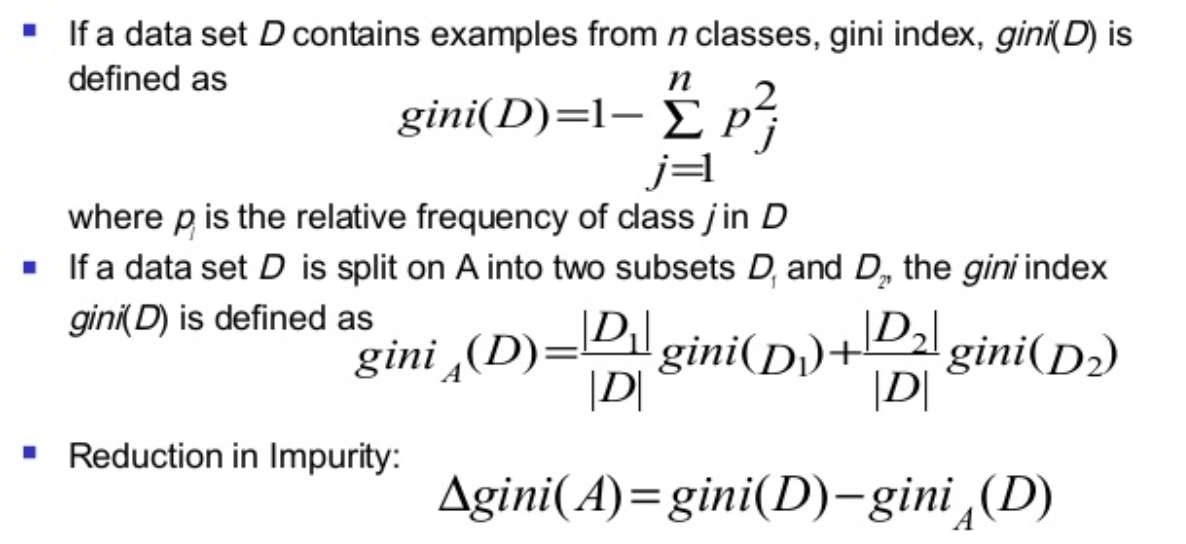

In [1197]:
Image("td4_ressources/img_gini index equation cart.png", retina=True)

### Random Forest example

interesting article introducing RandomForest & talking about intrees and RRF (regularized Random Forest): https://towardsdatascience.com/random-forest-3a55c3aca46d

*** CREDITS : ***  © Houtao_Deng_Medium

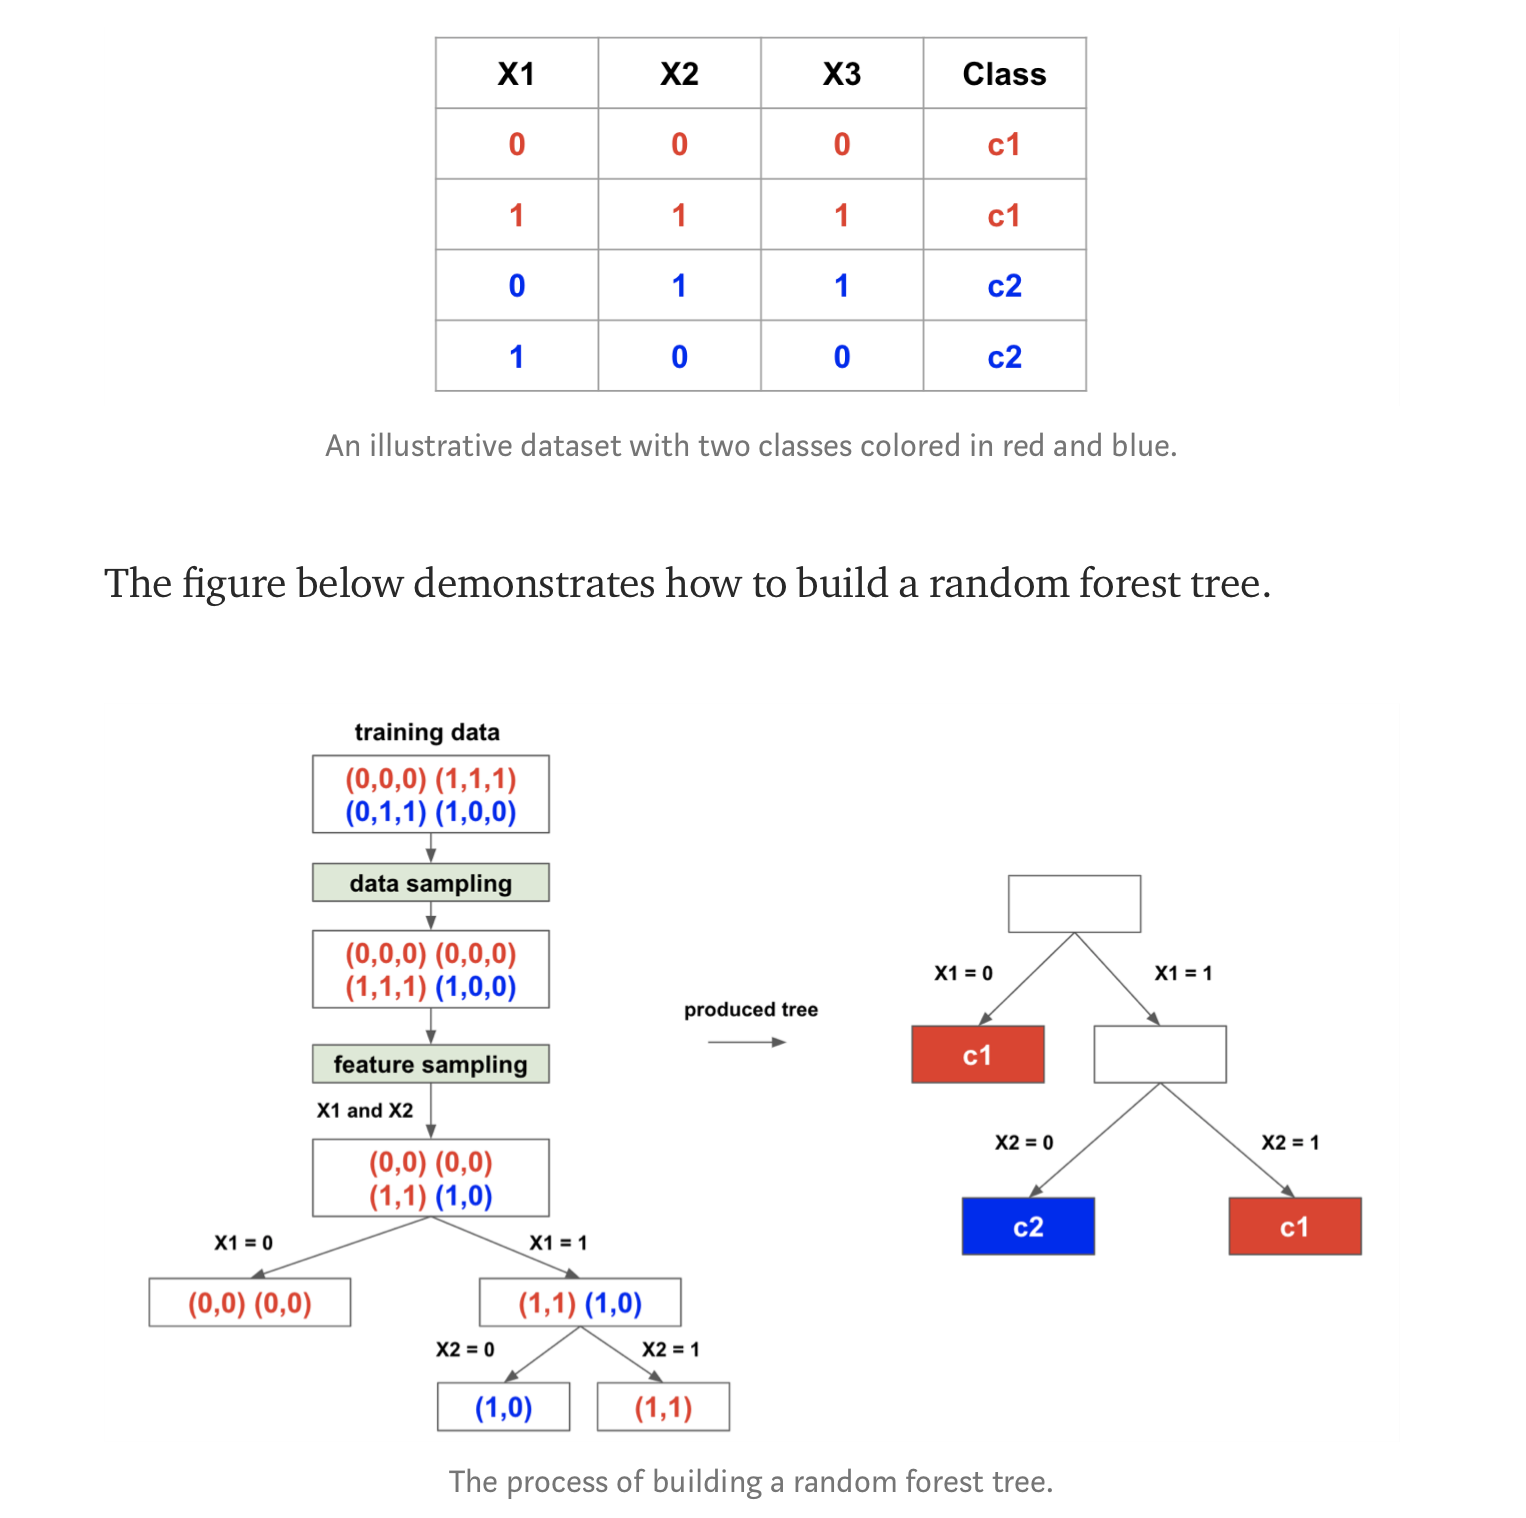

In [1198]:
Image("td4_ressources/img_random_forest_bagging_Houtao_Deng_Medium.png", retina=True)

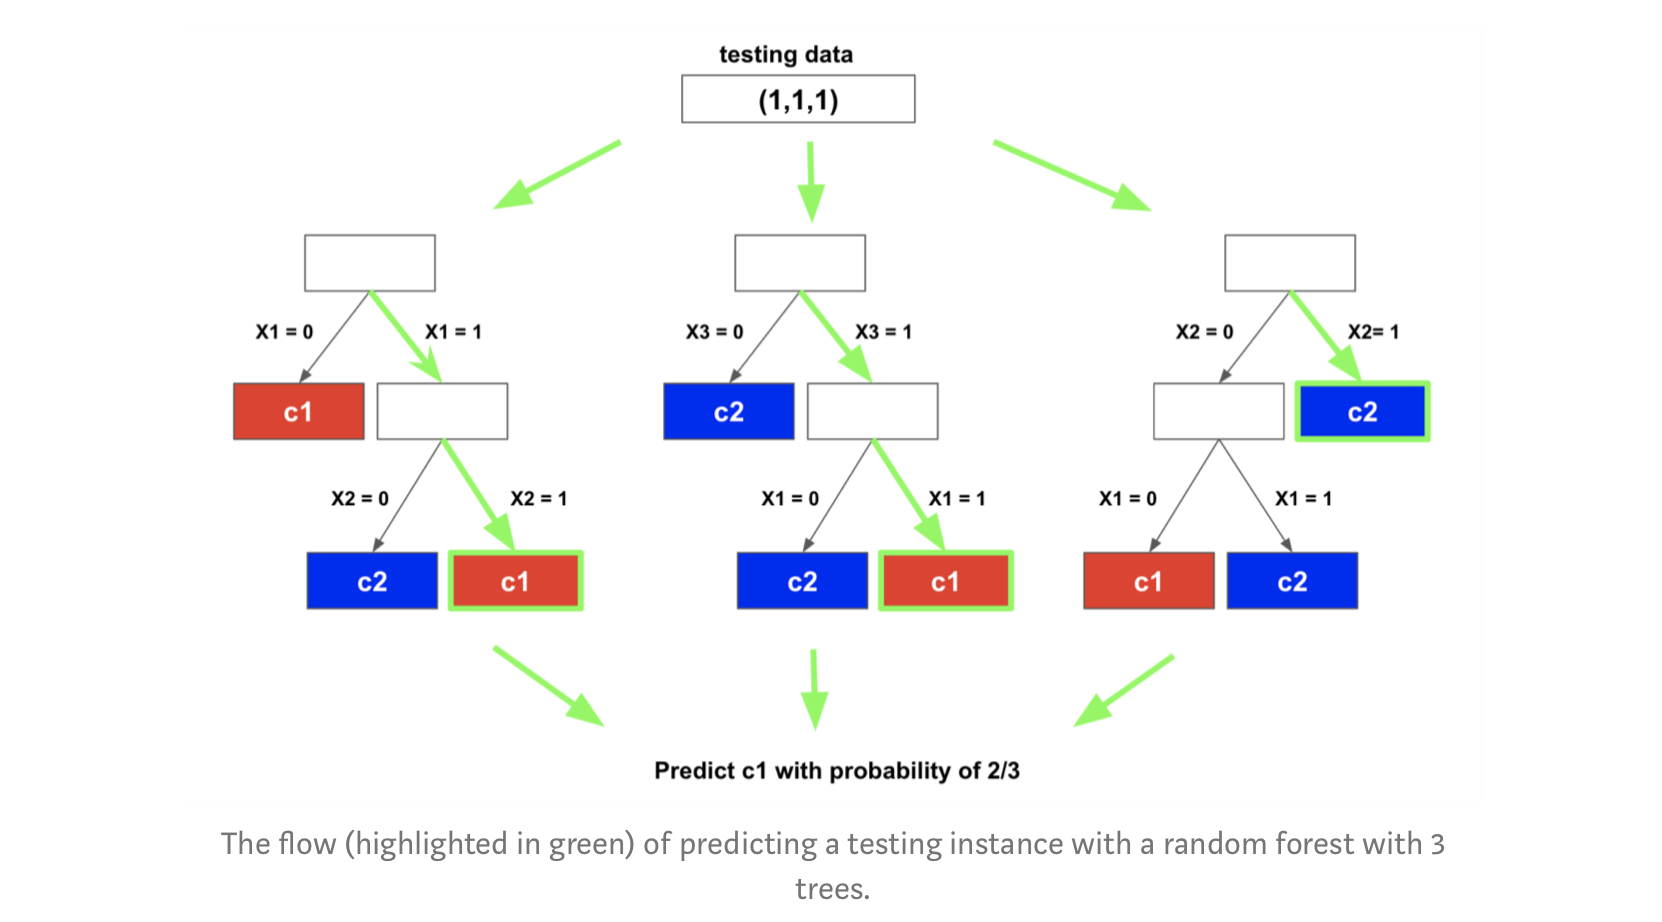

In [1199]:
Image("td4_ressources/img_random_forest_testing_Houtao_Deng_Medium.png",retina=True)

In [1200]:
from sklearn.ensemble import RandomForestRegressor
hyperparametres = { 'n_estimators':30 }
algorithme = RandomForestRegressor(**hyperparametres)
score = get_score(algorithme, X_train, X_test, y_train, y_test)
performances[algorithme] = score

fitting :
RandomForestRegressor(n_estimators=30)
X_train:(15480, 8) , X_test:(5160, 8) ,  y_train:(15480,) ,  y_test:(5160,)


In [1201]:
hyperparametres = {"n_estimators"  :  30, "max_features"  :  3, "max_depth"     :  50,}
algorithme = RandomForestRegressor(**hyperparametres)
score = get_score(algorithme, X_train, X_test, y_train, y_test)
performances[algorithme] = score

fitting :
RandomForestRegressor(max_depth=50, max_features=3, n_estimators=30)
X_train:(15480, 8) , X_test:(5160, 8) ,  y_train:(15480,) ,  y_test:(5160,)


### ExtraTreesRegressor

In [1202]:
from sklearn.ensemble import ExtraTreesRegressor

algorithme = ExtraTreesRegressor()
score      = get_score(algorithme, X_train, X_test, y_train, y_test)
performances[algorithme] = score

fitting :
ExtraTreesRegressor()
X_train:(15480, 8) , X_test:(5160, 8) ,  y_train:(15480,) ,  y_test:(5160,)


utiliser n_jobs = -1 c'est mieux pour paralléliser quand on a plusieurs CPUs

### SVR 

In [1203]:
from sklearn import svm
algorithme = svm.SVR(kernel='linear')
score      = get_score(algorithme, X_train, X_test, y_train, y_test)
performances[algorithme] = score
print(score)

fitting :
SVR(kernel='linear')
X_train:(15480, 8) , X_test:(5160, 8) ,  y_train:(15480,) ,  y_test:(5160,)
0.22396975043473788


### catboost

installation : !pip install catboost

In [1206]:
from catboost import CatBoostRegressor

In [2266]:
#algorithme = CatBoostRegressor(task_type="CPU")
#modele     = algorithme.fit(X_train, y_train)
#score      = algorithme.score(X_test, y_test)
#performances['catboost'] = score

### Simple visualisation des performances des différents algos

In [1208]:
from collections import OrderedDict
dico_ordonne = OrderedDict(performances)

import pandas as pd
df = pd.DataFrame()
df["perf"] = dico_ordonne.values()
df["algo"] = dico_ordonne.keys()
df['nom_algo'] = df.algo.apply(lambda algo: str(algo).split('(')[0])
df.set_index('nom_algo', inplace=True)
df

/Users/lucbertin/.pyenv/versions/3.8.4/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


perf  \
nom_algo                          
LinearRegression       0.595154   
DecisionTreeRegressor  0.609499   
RandomForestRegressor  0.794347   
RandomForestRegressor  0.804353   
ExtraTreesRegressor    0.802039   
SVR                    0.223970   
catboost               0.843861   

                                                                    algo  
nom_algo                                                                  
LinearRegression                                      LinearRegression()  
DecisionTreeRegressor                            DecisionTreeRegressor()  
RandomForestRegressor  (DecisionTreeRegressor(max_features='auto', ra...  
RandomForestRegressor  (DecisionTreeRegressor(max_depth=50, max_featu...  
ExtraTreesRegressor    (ExtraTreeRegressor(random_state=1365029830), ...  
SVR                                                 SVR(kernel='linear')  
catboost                                                        catboost

/Users/lucbertin/.pyenv/versions/3.8.4/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='nom_algo'>

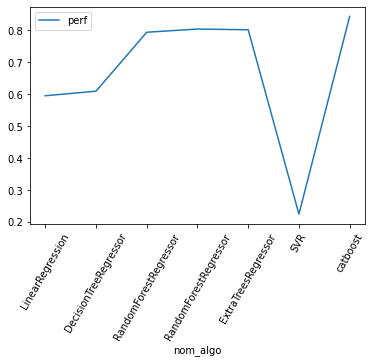

In [1209]:
df[["perf"]].plot(kind='line', rot=60)

## Aller au delà des hyperparamètres par défaut d'un modèle avec GridSearch

mieux d'utiliser n_jobs=-1 si plusieurs CPU pour paralléliser

Par défaut scikit-learn optimise les hyperparamètres tout en faisant une **cross-validation**. Sans celle-ci, c’est comme si le modèle optimisait ses coefficients sur la base d’apprentissage et ses hyperparamètres sur la base de test. De ce fait, toutes les données servent à optimiser un paramètre. La cross-validation limite en **vérifiant la stabilité de l’apprentissage sur plusieurs découpages**. On peut également découper en train / test / validation mais cela réduit d’autant le nombre de données pour apprendre.

<img src="td4_ressources/how_to_split_datasets.png">

> Stackoverflow : 
- All estimators in scikit where name ends with CV perform cross-validation. But you need to keep a separate test set for measuring the performance.

- So you need to split your whole data to train and test and then forget about this test data for a while.

- you will then pass this train data only to grid-search. GridSearch will split this train data further into train and test to tune the hyper-parameters passed to it. And finally fit the model on the whole initial training data with best found parameters.

- Now you need to test this model on the test data you kept aside since the beginning. This will give you the near real world performance of model.

- If you use the whole data into GridSearchCV, then there would be leakage of test data into parameter tuning and then the final model may not perform that well on newer unseen data.

In [1212]:
from sklearn.model_selection import GridSearchCV

In [1313]:
param_grid = {
    'C'     : np.linspace(0, 2, 10),
    'gamma' : np.linspace(0, 2, 10)
}
grid = GridSearchCV(estimator=svm.SVR(), 
                    param_grid=param_grid, 
                    n_jobs=-1, cv=3, verbose=2)

### ON ENTRAINE TOUJOURS LA GRILLE SUR LES DONNÉES D'ENTRAINEMENT !

In [1314]:
grid.fit(X_train, y_train) 

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.2min finished


GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'C': array([0.        , 0.22222222, 0.44444444, 0.66666667, 0.88888889,
       1.11111111, 1.33333333, 1.55555556, 1.77777778, 2.        ]),
                         'gamma': array([0.        , 0.22222222, 0.44444444, 0.66666667, 0.88888889,
       1.11111111, 1.33333333, 1.55555556, 1.77777778, 2.        ])},
             verbose=2)

In [1315]:
grid.cv_results_

{'mean_fit_time': array([2.87985802e-03, 3.07774544e-03, 3.49060694e-03, 2.83010801e-03,
        2.54456202e-03, 2.36543020e-03, 2.96545029e-03, 3.14235687e-03,
        3.02155813e-03, 3.10770671e-03, 4.35576518e+00, 5.45484789e+00,
        5.33367936e+00, 5.08848143e+00, 5.11562395e+00, 4.93779731e+00,
        4.91950901e+00, 5.02251569e+00, 5.07332786e+00, 5.24234764e+00,
        3.71944729e+00, 5.53809182e+00, 5.72629245e+00, 5.48424172e+00,
        5.61390662e+00, 6.21719495e+00, 6.61741455e+00, 6.58587146e+00,
        6.17991837e+00, 6.43122490e+00, 4.15628123e+00, 5.49778763e+00,
        5.55532972e+00, 5.82066313e+00, 6.00262809e+00, 6.07418243e+00,
        6.31064606e+00, 6.41253972e+00, 6.76197767e+00, 7.19659233e+00,
        4.11235499e+00, 5.60772665e+00, 5.92431696e+00, 6.16026799e+00,
        6.48453363e+00, 6.71778830e+00, 6.82982937e+00, 7.30440140e+00,
        7.63539052e+00, 7.89080628e+00, 3.90299853e+00, 5.95283906e+00,
        6.32891870e+00, 6.68975941e+00, 7.01873

In [1316]:
params = pd.DataFrame(grid.cv_results_.get("params"))
results = pd.DataFrame(
    {k:v for k,v in grid.cv_results_.items() 
     if k.startswith('split')})
df_grid = pd.concat([params, results], axis=1)

In [1317]:
df_grid

C     gamma  split0_test_score  split1_test_score  split2_test_score
0   0.0  0.000000                NaN                NaN                NaN
1   0.0  0.222222                NaN                NaN                NaN
2   0.0  0.444444                NaN                NaN                NaN
3   0.0  0.666667                NaN                NaN                NaN
4   0.0  0.888889                NaN                NaN                NaN
..  ...       ...                ...                ...                ...
95  2.0  1.111111           0.763388           0.738154           0.746705
96  2.0  1.333333           0.756772           0.730740           0.740926
97  2.0  1.555556           0.749268           0.722157           0.733759
98  2.0  1.777778           0.741160           0.713048           0.725705
99  2.0  2.000000           0.732528           0.704328           0.717436

[100 rows x 5 columns]

In [1357]:
for name,group in df_grid.groupby(["C", "gamma"]):
    group.plot()

AttributeError: 'DataFrameGroupBy' object has no attribute 'stack'

In [1362]:
df_grid.set_index(["C", "gamma"]).stack().unstack(-1).T

C                  0.222222                                                    \
gamma              0.000000  0.222222  0.444444  0.666667  0.888889  1.111111   
split0_test_score -0.061961  0.732145  0.733734  0.725165  0.713062  0.697221   
split1_test_score -0.055785  0.709255  0.712631  0.703776  0.690646  0.674890   
split2_test_score -0.055906  0.717735  0.718524  0.709328  0.696713  0.681722   

C                                                          ...  2.000000  \
gamma              1.333333  1.555556  1.777778  2.000000  ...  0.000000   
split0_test_score  0.679276  0.659610  0.638452  0.617356  ... -0.061961   
split1_test_score  0.657763  0.640167  0.622458  0.604209  ... -0.055785   
split2_test_score  0.665935  0.648593  0.630379  0.611251  ... -0.055906   

C                                                                              \
gamma              0.222222  0.444444  0.666667  0.888889  1.111111  1.333333   
split0_test_score  0.764628  0.772383  0.771740  0.769158  0.763388  0.756772   
split1_test_score  0.747615  0.752949  0.751088  0.745379  0.738154  0.730740   
split2_test_score  0.756975  0.760572  0.757749  0.752388  0.746705  0.740926   

C                                                
gamma              1.555556  1.777778  2.000000  
split0_test_score  0.749268  0.741160  0.732528  
split1_test_score  0.722157  0.713048  0.704328  
split2_test_score  0.733759  0.725705  0.717436  

[3 rows x 90 columns]

/Users/lucbertin/.pyenv/versions/3.8.4/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


(array([-0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,
         2.  ,  2.25]),
 [Text(-0.25, 0, ''),
  Text(0.0, 0, 'split0_test_score'),
  Text(0.25, 0, ''),
  Text(0.5, 0, ''),
  Text(0.75, 0, ''),
  Text(1.0, 0, 'split1_test_score'),
  Text(1.25, 0, ''),
  Text(1.5, 0, ''),
  Text(1.75, 0, ''),
  Text(2.0, 0, 'split2_test_score'),
  Text(2.25, 0, '')])

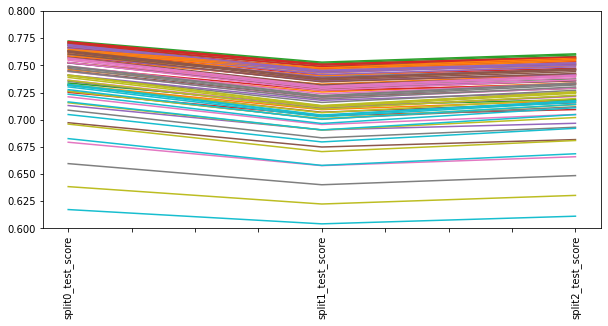

In [1372]:
ax = df_grid.set_index(["C", "gamma"]).T.plot(kind="line", figsize=(10,4))
ax.set_ylim(0.6, 0.8)
ax.get_legend().remove()
plt.xticks(rotation=90)

In [1319]:
pivot = df_grid.pivot_table(index='C', columns='gamma').stack(level=1).apply(np.mean, axis=1)

<AxesSubplot:xlabel='gamma', ylabel='C'>

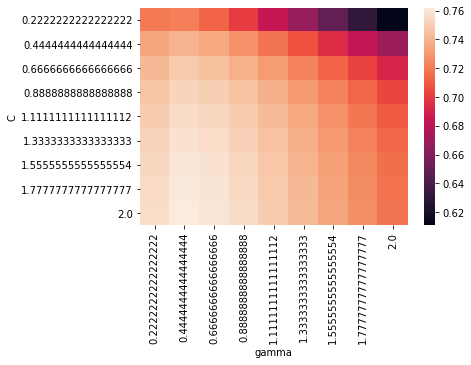

In [1374]:
sns.heatmap(pivot.unstack().iloc[:, 1:])

In [1375]:
grid.best_params_

{'C': 2.0, 'gamma': 0.4444444444444444}

In [1376]:
grid.best_estimator_

SVR(C=2.0, gamma=0.4444444444444444)

In [1377]:
grid.best_score_

0.7619681962801373

### on peut alors réutiliser ce best estimator en le réentrainant sur l'ensemble de X_train et pas un subset de X_train 

In [1310]:
model = svm.SVR(C=1.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [1311]:
model.fit(X_train, y_train)

SVR(C=1.5, gamma=0.1)

In [1312]:
model.score(X_test, y_test)

0.726282532325518

performance proche du split

### à tâton pour trouver le meilleur modèle 

In [58]:
hyperparametres_possibles = {
    'C'     : [1.5, 2, 2.5],
    'gamma' :[0.01, 0.05, 1]
}
grid = grid_search.GridSearchCV(estimator=svm.SVR(), 
                                param_grid=hyperparametres_possibles, 
                                n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_score_
grid.best_params_

{'C': 2.5, 'gamma': 0.05}

In [59]:
hyperparametres_possibles = {
    'C'     : [2.5, 3, 3.5],
    'gamma' :[0.01, 0.05, 1]
}
grid = grid_search.GridSearchCV(estimator=svm.SVR(), 
                                param_grid=hyperparametres_possibles, 
                                n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_score_
grid.best_params_

{'C': 3.5, 'gamma': 0.05}

In [60]:
hyperparametres_possibles = {
    'C'     : [3.5, 4, 5, 6],
    'gamma' :[0.01, 0.05, 1]
}
grid = grid_search.GridSearchCV(estimator=svm.SVR(), 
                                param_grid=hyperparametres_possibles, 
                                n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_score_, grid.best_params_

(0.7501429622074626, {'C': 6, 'gamma': 0.05})

In [61]:
hyperparametres_possibles = {
    'C'     : [ 6, 8, 10],
    'gamma' :[0.01, 0.05, 1]
}
grid = grid_search.GridSearchCV(estimator=svm.SVR(), 
                                param_grid=hyperparametres_possibles, 
                                n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_score_, grid.best_params_

(0.7741648460590741, {'C': 10, 'gamma': 0.05})

In [62]:
hyperparametres_possibles = {
    'C'     : [ 10, 15, 20],
    'gamma' :[0.01, 0.05, 1]
}
grid = grid_search.GridSearchCV(estimator=svm.SVR(), 
                                param_grid=hyperparametres_possibles, 
                                n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_score_, grid.best_params_

(0.7872540631505356, {'C': 15, 'gamma': 0.05})

## Assess model stability (Using Bootstrap)

In [63]:
from sklearn.utils import resample

In [64]:
resample(X, y, n_samples = 2, replace=True)

[array([[7.52601e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 7.13000e-01,
         6.41700e+00, 9.83000e+01, 2.18500e+00, 2.40000e+01, 6.66000e+02,
         2.02000e+01, 3.04210e+02, 1.93100e+01],
        [4.41780e-01, 0.00000e+00, 6.20000e+00, 0.00000e+00, 5.04000e-01,
         6.55200e+00, 2.14000e+01, 3.37510e+00, 8.00000e+00, 3.07000e+02,
         1.74000e+01, 3.80340e+02, 3.76000e+00]]), array([13. , 31.5])]

In [90]:
def Simulation(algorithme, X, y, nb_simulations=100):
    from sklearn.model_selection import train_test_split
    ## where we store all scores from simulations
    scores = []
    for i in range(nb_simulations):
        ## Resample with replacement in all dataset
        random_indexes = np.random.choice(range(np.size(X, axis=0)), size=np.size(X, axis=0),replace=True)
        the_rest       = [x for x in range(np.size(X, axis=0)) if x not in random_indexes]
        ## Split in Train, Test (0.75/0.25) and compute score
        scores.append(get_score(algorithme, 
                                X_train=X[random_indexes, :],
                                X_test =X[the_rest, :],
                                y_train=y[random_indexes],
                                y_test =y[the_rest],
                                display_options=False))
    return scores

In [84]:
scores_decision_trees        = Simulation(DecisionTreeRegressor(),X, y, nb_simulations=1000)
scores_rf                    = Simulation(RandomForestRegressor(),X, y, nb_simulations=1000)
scores_linear_regression_OLS = Simulation(LinearRegression(),X, y, nb_simulations=1000)

/Users/lucbertin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/lucbertin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lucbertin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lucbertin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: 

Text(0.5,1,'Boostrap procedure to assess model stability')

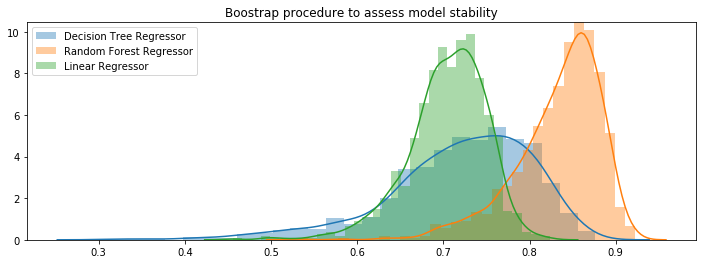

In [85]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=1)
sns.distplot(scores_decision_trees, ax=ax)
sns.distplot(scores_rf, ax=ax)
sns.distplot(scores_linear_regression_OLS, ax=ax)
plt.legend(["Decision Tree Regressor", "Random Forest Regressor", "Linear Regressor"])
plt.title("Boostrap procedure to assess model stability")
#sns.distplot(scores_elasticnet, ax=ax)

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
def grid_search_best_score(algorithme, hyperparametres):
    from sklearn.grid_search import GridSearchCV
    grid = GridSearchCV(algorithme, param_grid=hyperparametres, scoring='r2', n_jobs=-1)
    grid.fit(X_train, y_train)
    return grid.best_score_, grid.best_estimator_

In [ ]:
hyperparametres = {'alpha':[1.0], 'l1_ratio':[0.5]}
grid_search_best_score(ElasticNet(), hyperparametres)

In [ ]:
hyperparametres = {'alpha':np.linspace(0.1,0.9,50), 'l1_ratio':np.linspace(0.1,0.9,50)}
grid_search_best_score(ElasticNet(), hyperparametres)

In [ ]:
hyperparametres = {'alpha':np.linspace(0.01,0.1,10), 'l1_ratio':np.linspace(0.01,0.1,10)}
grid_search_best_score(ElasticNet(), hyperparametres)

In [ ]:
hyperparametres = {'alpha':np.linspace(0.025, 0.035,10), 'l1_ratio':[0.001]}
grid_search_best_score(ElasticNet(), hyperparametres)

In [ ]:
np.mean(scores_decision_trees), np.mean(scores_rf)

In [ ]:
np.std(scores_decision_trees), np.std(scores_rf)

# Fin.

## Annexes, nice ressources // 

<img src="td4_ressources/img_model_complexity_trade_off.png" width="60%" align="left">

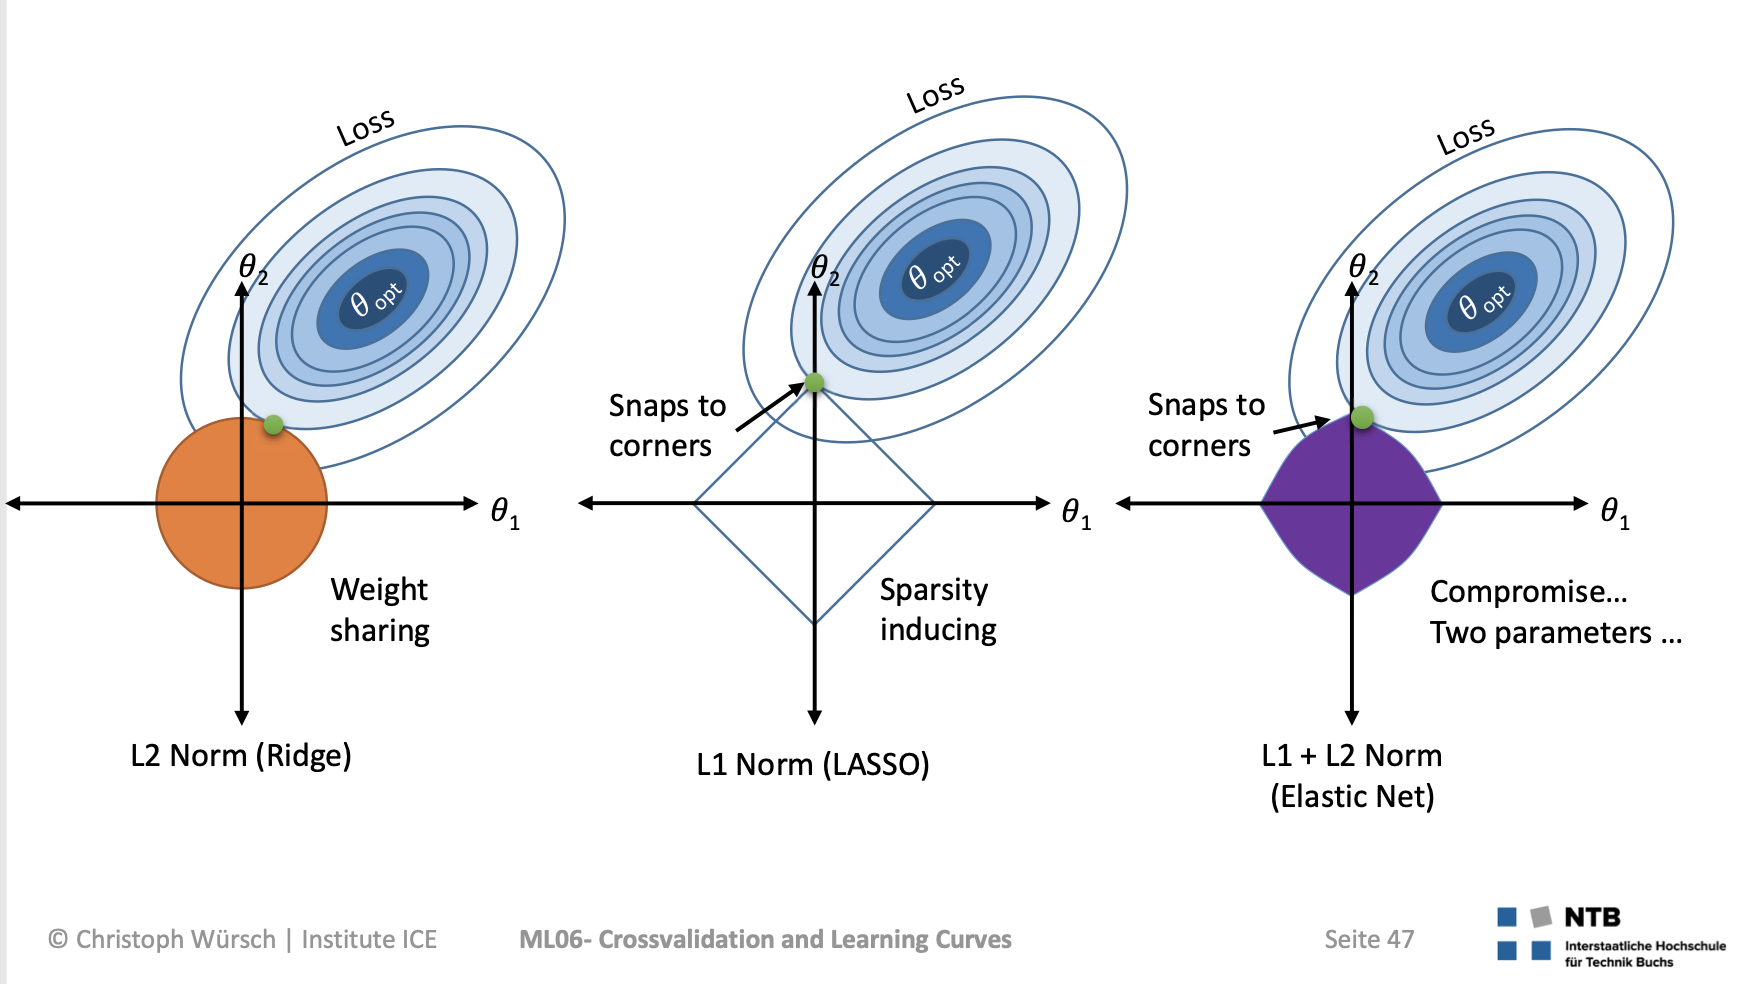

In [48]:
Image("td4_ressources/img_Ridge_Lasso_Regularization.png", retina=True)

<img src="td4_ressources/img_bias_and_variance_for_ridge.png" width="50%" align="left">

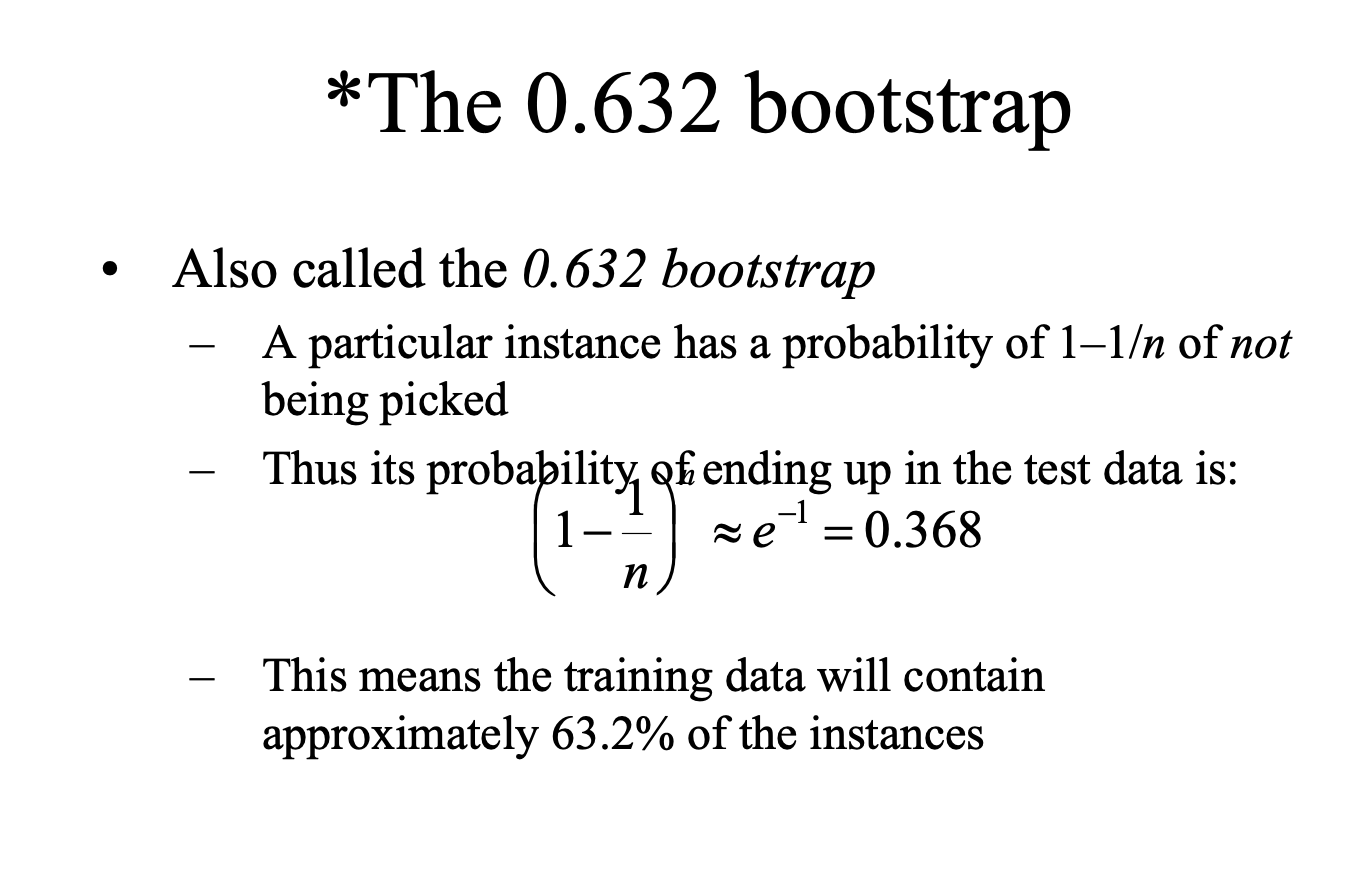

In [2265]:
Image("td4_ressources/img_bootstrap_limit_0638.png", width=600)

*** Credits: *** Stanford Edu